*******************************************************************************************************
*******************************************************************************************************
# PROJECT (code)

**A comparison and application of machine learning techniques towards the analysis of UCI's hepatitis disease dataset.**

In [1]:
# Python libraries for data pre-processing
import pandas as pd
import numpy as np

# Python libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df3 = pd.read_csv('hepatitis.csv')

# Data Preprocessing

In [3]:
df3.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [4]:
df3["class"].replace((1,2),(0,1),inplace=True)

df3["class"].head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
137    0
138    1
139    1
140    1
141    0
Name: class, Length: 142, dtype: int64>

In [5]:
df3["sex"].replace((1,2),(0,1),inplace=True)
df3["steroid"].replace((1,2),(0,1),inplace=True)
df3["antivirals"].replace((1,2),(0,1),inplace=True)
df3["fatigue"].replace((1,2),(0,1),inplace=True)
df3["malaise"].replace((1,2),(0,1),inplace=True)
df3["anorexia"].replace((1,2),(0,1),inplace=True)
df3["liver_big"].replace((1,2),(0,1),inplace=True)
df3["liver_firm"].replace((1,2),(0,1),inplace=True)
df3["spleen_palable"].replace((1,2),(0,1),inplace=True)
df3["spiders"].replace((1,2),(0,1),inplace=True)
df3["ascites"].replace((1,2),(0,1),inplace=True)
df3["varices"].replace((1,2),(0,1),inplace=True)
df3["histology"].replace((1,2),(0,1),inplace=True)

In [6]:
df3.head(2)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,1,30,1,0,1,1,1,1,0,1,1,1,1,1,1.0,85,18,4.0,61,0
1,1,50,0,0,1,0,1,1,0,1,1,1,1,1,0.9,135,42,3.5,61,0


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           142 non-null    int64  
 1   age             142 non-null    int64  
 2   sex             142 non-null    int64  
 3   steroid         142 non-null    int64  
 4   antivirals      142 non-null    int64  
 5   fatigue         142 non-null    int64  
 6   malaise         142 non-null    int64  
 7   anorexia        142 non-null    int64  
 8   liver_big       142 non-null    int64  
 9   liver_firm      142 non-null    int64  
 10  spleen_palable  142 non-null    int64  
 11  spiders         142 non-null    int64  
 12  ascites         142 non-null    int64  
 13  varices         142 non-null    int64  
 14  bilirubin       142 non-null    float64
 15  alk_phosphate   142 non-null    int64  
 16  sgot            142 non-null    int64  
 17  albumin         142 non-null    flo

In [8]:
# Checking for Missing Values MV: 
df3.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [9]:
# Checking for duplicated rows
duplicates = df3[df3.duplicated()]
print("Number of duplicate rows :: ", duplicates.shape)

Number of duplicate rows ::  (0, 20)


In [10]:
df3.shape

(142, 20)

# Exploratory Data Analysis (EDA)

In [11]:
# # Converting categorical attributes to text for better data exploratory and visualization

# df3['class'][df3['class'] == 0] = 'No Hepatitis'
# df3['class'][df3['class'] == 1] = 'Has Hepatitis'

# df3['sex'][df3['sex'] == 0] = 'Female'
# df3['sex'][df3['sex'] == 1] = 'Male'

# df3['steroid'][df3['steroid'] == 0] = 'No steroid'
# df3['steroid'][df3['steroid'] == 1] = 'Yes steroid'

# df3['antivirals'][df3['antivirals'] == 0] = 'No antivirals'
# df3['antivirals'][df3['antivirals'] == 1] = 'Yes antivirals'

# df3['fatigue'][df3['fatigue'] == 0] = 'No fatigue'
# df3['fatigue'][df3['fatigue'] == 1] = 'Yes fatigue'

# df3['malaise'][df3['malaise'] == 0] = 'No malaise'
# df3['malaise'][df3['malaise'] == 1] = 'Yes malaise'

# df3['anorexia'][df3['anorexia'] == 0] = 'No anorexia'
# df3['anorexia'][df3['anorexia'] == 1] = 'Yes anorexia'

# df3['liver_big'][df3['liver_big'] == 0] = 'No liver_big'
# df3['liver_big'][df3['liver_big'] == 1] = 'Yes liver_big'

# df3['liver_firm'][df3['liver_firm'] == 0] = 'No liver_firm'
# df3['liver_firm'][df3['liver_firm'] == 1] = 'Yes liver_firm'

# df3['spleen_palable'][df3['spleen_palable'] == 0] = 'No spleen_palable'
# df3['spleen_palable'][df3['spleen_palable'] == 1] = 'Yes spleen_palable'

# df3['spiders'][df3['spiders'] == 0] = 'No spiders'
# df3['spiders'][df3['spiders'] == 1] = 'Yes spiders'

# df3['ascites'][df3['ascites'] == 0] = 'No ascites'
# df3['ascites'][df3['ascites'] == 1] = 'Yes ascites'

# df3['varices'][df3['varices'] == 0] = 'No varices'
# df3['varices'][df3['varices'] == 1] = 'Yes varices'

# df3['histology'][df3['histology'] == 0] = 'No histology'
# df3['histology'][df3['histology'] == 1] = 'Yes histology'


In [12]:
# Converting categorical attributes to text for better data exploratory and visualization

df3['class'][df3['class'] == 0] = 'No (Hepatitis)'
df3['class'][df3['class'] == 1] = 'Has (Hepatitis)'

df3['sex'][df3['sex'] == 0] = 'Female'
df3['sex'][df3['sex'] == 1] = 'Male'

df3['steroid'][df3['steroid'] == 0] = 'No (steroid)'
df3['steroid'][df3['steroid'] == 1] = 'Yes (steroid)'

df3['antivirals'][df3['antivirals'] == 0] = 'No (antivirals)'
df3['antivirals'][df3['antivirals'] == 1] = 'Yes (antivirals)'

df3['fatigue'][df3['fatigue'] == 0] = 'No (fatigue)'
df3['fatigue'][df3['fatigue'] == 1] = 'Yes (fatigue)'

df3['malaise'][df3['malaise'] == 0] = 'No (malaise)'
df3['malaise'][df3['malaise'] == 1] = 'Yes (malaise)'

df3['anorexia'][df3['anorexia'] == 0] = 'No (anorexia)'
df3['anorexia'][df3['anorexia'] == 1] = 'Yes (anorexia)'

df3['liver_big'][df3['liver_big'] == 0] = 'No (liver_big)'
df3['liver_big'][df3['liver_big'] == 1] = 'Yes (liver_big)'

df3['liver_firm'][df3['liver_firm'] == 0] = 'No (liver_firm)'
df3['liver_firm'][df3['liver_firm'] == 1] = 'Yes (liver_firm)'

df3['spleen_palable'][df3['spleen_palable'] == 0] = 'No (spleen_palable)'
df3['spleen_palable'][df3['spleen_palable'] == 1] = 'Yes (spleen_palable)'

df3['spiders'][df3['spiders'] == 0] = 'No (spiders)'
df3['spiders'][df3['spiders'] == 1] = 'Yes (spiders)'

df3['ascites'][df3['ascites'] == 0] = 'No (ascites)'
df3['ascites'][df3['ascites'] == 1] = 'Yes (ascites)'

df3['varices'][df3['varices'] == 0] = 'No (varices)'
df3['varices'][df3['varices'] == 1] = 'Yes (varices)'

df3['histology'][df3['histology'] == 0] = 'No (histology)'
df3['histology'][df3['histology'] == 1] = 'Yes (histology)'


In [13]:
df3['class'].value_counts()

Has (Hepatitis)    116
No (Hepatitis)      26
Name: class, dtype: int64

In [14]:
df3["sex"].value_counts()

Female    127
Male       15
Name: sex, dtype: int64

In [15]:
df3["steroid"].value_counts()

Yes (steroid)    73
No (steroid)     69
Name: steroid, dtype: int64

In [16]:
df3["antivirals"].value_counts()

Yes (antivirals)    119
No (antivirals)      23
Name: antivirals, dtype: int64

In [17]:
df3["fatigue"].value_counts()

No (fatigue)     91
Yes (fatigue)    51
Name: fatigue, dtype: int64

In [18]:
df3["malaise"].value_counts()

Yes (malaise)    88
No (malaise)     54
Name: malaise, dtype: int64

In [19]:
df3["anorexia"].value_counts()

Yes (anorexia)    113
No (anorexia)      29
Name: anorexia, dtype: int64

In [20]:
df3["liver_big"].value_counts()

Yes (liver_big)    117
No (liver_big)      25
Name: liver_big, dtype: int64

In [21]:
df3["liver_firm"].value_counts()

Yes (liver_firm)    83
No (liver_firm)     59
Name: liver_firm, dtype: int64

In [22]:
df3["spleen_palable"].value_counts()

Yes (spleen_palable)    115
No (spleen_palable)      27
Name: spleen_palable, dtype: int64

In [23]:
df3["spiders"].value_counts()

Yes (spiders)    95
No (spiders)     47
Name: spiders, dtype: int64

In [24]:
df3["ascites"].value_counts()

Yes (ascites)    125
No (ascites)      17
Name: ascites, dtype: int64

In [25]:
df3["varices"].value_counts()

Yes (varices)    125
No (varices)      17
Name: varices, dtype: int64

In [26]:
df3["histology"].value_counts()

No (histology)     79
Yes (histology)    63
Name: histology, dtype: int64

In [27]:
# Data.head visualization of modification to categorical attributes
df3.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,Has (Hepatitis),30,Male,No (steroid),Yes (antivirals),Yes (fatigue),Yes (malaise),Yes (anorexia),No (liver_big),Yes (liver_firm),Yes (spleen_palable),Yes (spiders),Yes (ascites),Yes (varices),1.0,85,18,4.0,61,No (histology)
1,Has (Hepatitis),50,Female,No (steroid),Yes (antivirals),No (fatigue),Yes (malaise),Yes (anorexia),No (liver_big),Yes (liver_firm),Yes (spleen_palable),Yes (spiders),Yes (ascites),Yes (varices),0.9,135,42,3.5,61,No (histology)
2,Has (Hepatitis),78,Female,Yes (steroid),Yes (antivirals),No (fatigue),Yes (malaise),Yes (anorexia),Yes (liver_big),Yes (liver_firm),Yes (spleen_palable),Yes (spiders),Yes (ascites),Yes (varices),0.7,96,32,4.0,61,No (histology)
3,Has (Hepatitis),34,Female,Yes (steroid),Yes (antivirals),Yes (fatigue),Yes (malaise),Yes (anorexia),Yes (liver_big),Yes (liver_firm),Yes (spleen_palable),Yes (spiders),Yes (ascites),Yes (varices),1.0,105,200,4.0,61,No (histology)
4,Has (Hepatitis),34,Female,Yes (steroid),Yes (antivirals),Yes (fatigue),Yes (malaise),Yes (anorexia),Yes (liver_big),Yes (liver_firm),Yes (spleen_palable),Yes (spiders),Yes (ascites),Yes (varices),0.9,95,28,4.0,75,No (histology)


In [28]:
df3.shape

(142, 20)

**Distribution of Hepatitis Disease ('class' Attribute)**

In [29]:
df3.groupby('class').size()


class
Has (Hepatitis)    116
No (Hepatitis)      26
dtype: int64

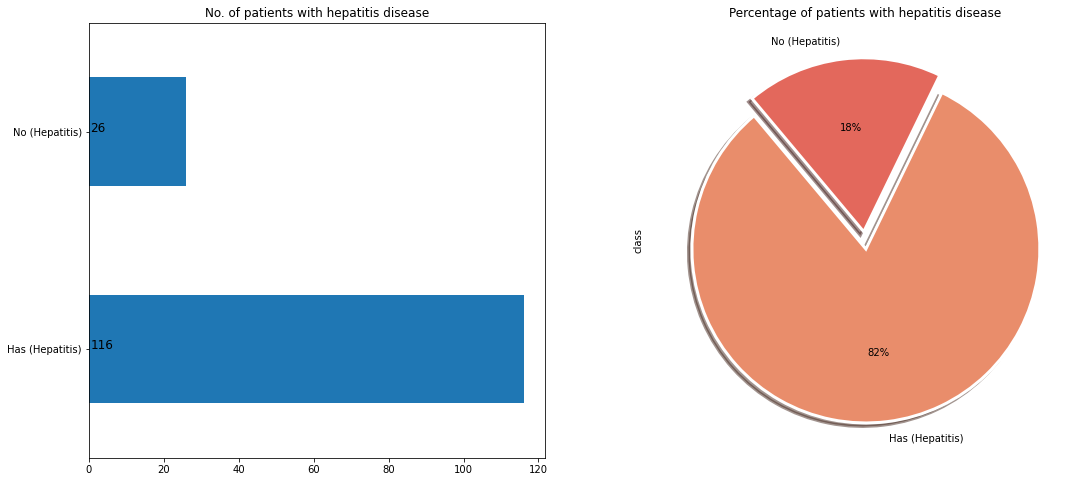

In [30]:
# plotting the distribution of 'Goal' attribute along those with and without heart diseases
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,8))

ax1 = df3["class"].value_counts().plot(kind="barh", ax =ax1)
for i,j in enumerate(df3["class"].value_counts().values):
    ax1.text(.5,i,j,fontsize=12)
ax1.set(title = 'No. of patients with hepatitis disease')


ax2 = df3['class'].value_counts().plot.pie(colors = sns.color_palette("flare"), 
                   autopct = "%1.0f%%", startangle = 130, wedgeprops={"linewidth":3,"edgecolor":"w"},
                                               explode=[.1/2,.1/2], shadow=True);
ax2.set(title = 'Percentage of patients with hepatitis disease')

plt.show()

In [31]:
# Grouping patients with and without heart diseases into two dinstinct dataframe for use in visualization below
class1=df3[df3['class']=='Has (Hepatitis)']
class0=df3[df3['class']=='No (Hepatitis)']

# Analysis of Numerical Attributes

In [32]:
#A discription of numberical attributes
df3.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,1.382958,105.647887,83.507042,3.830493,61.704225
std,12.189182,1.166526,47.375099,82.417700,0.618103,17.696732
min,7.000000,0.300000,26.000000,14.000000,2.100000,0.000000
25%,32.000000,0.700000,78.500000,32.250000,3.500000,56.250000
50%,39.000000,1.000000,100.000000,58.000000,3.900000,61.000000
75%,50.000000,1.480000,119.750000,99.500000,4.200000,66.000000
max,78.000000,8.000000,295.000000,648.000000,6.400000,100.000000


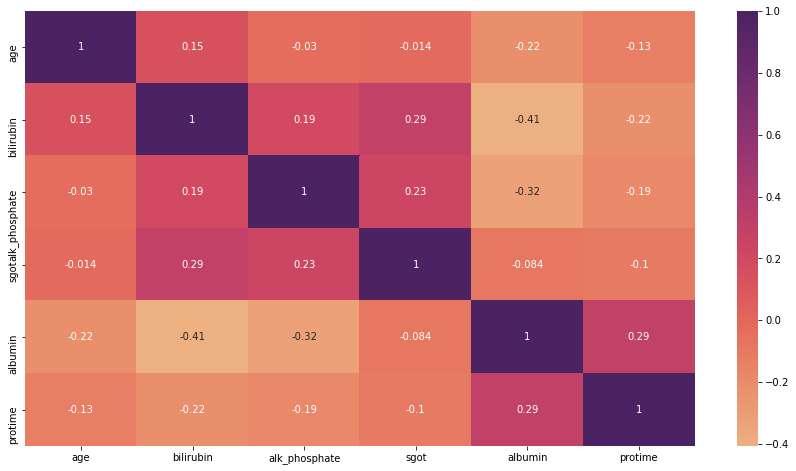

In [33]:
# A correletional heatmap of numberical attributes
plt.figure(figsize=(15,8))
sns.heatmap(df3.corr(), annot=True, cmap='flare', )
plt.show()

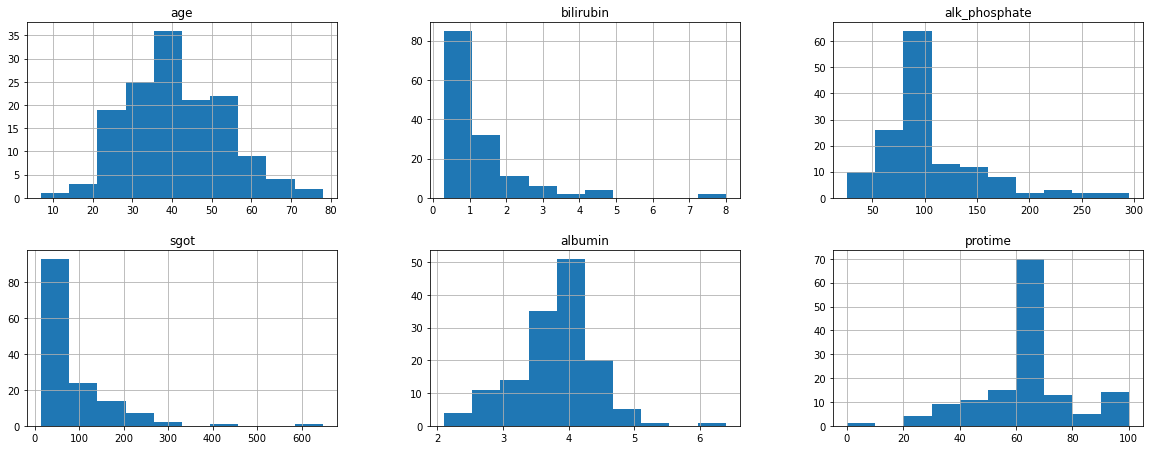

In [34]:
df3.hist(figsize=(20,20), layout=(5,3));

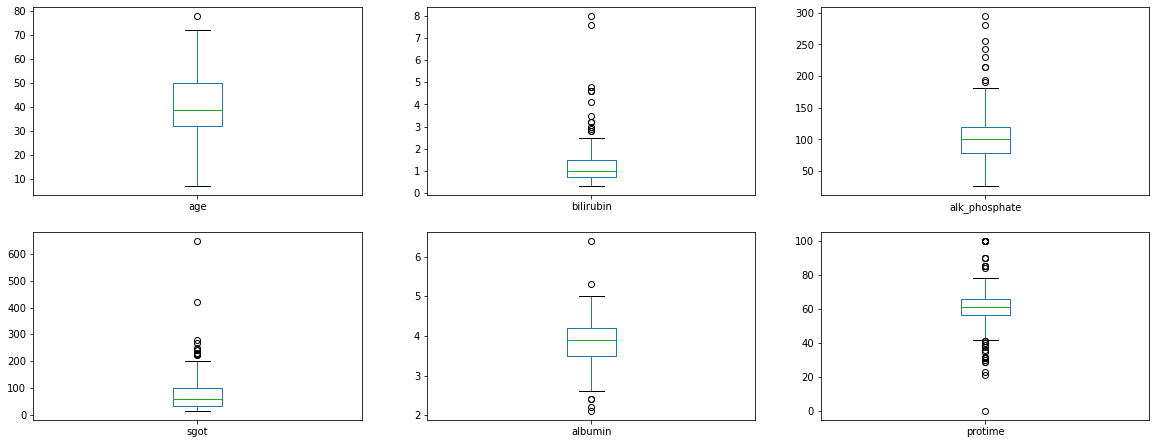

In [35]:
# box and whiskers plot
df3.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,20))
plt.show()

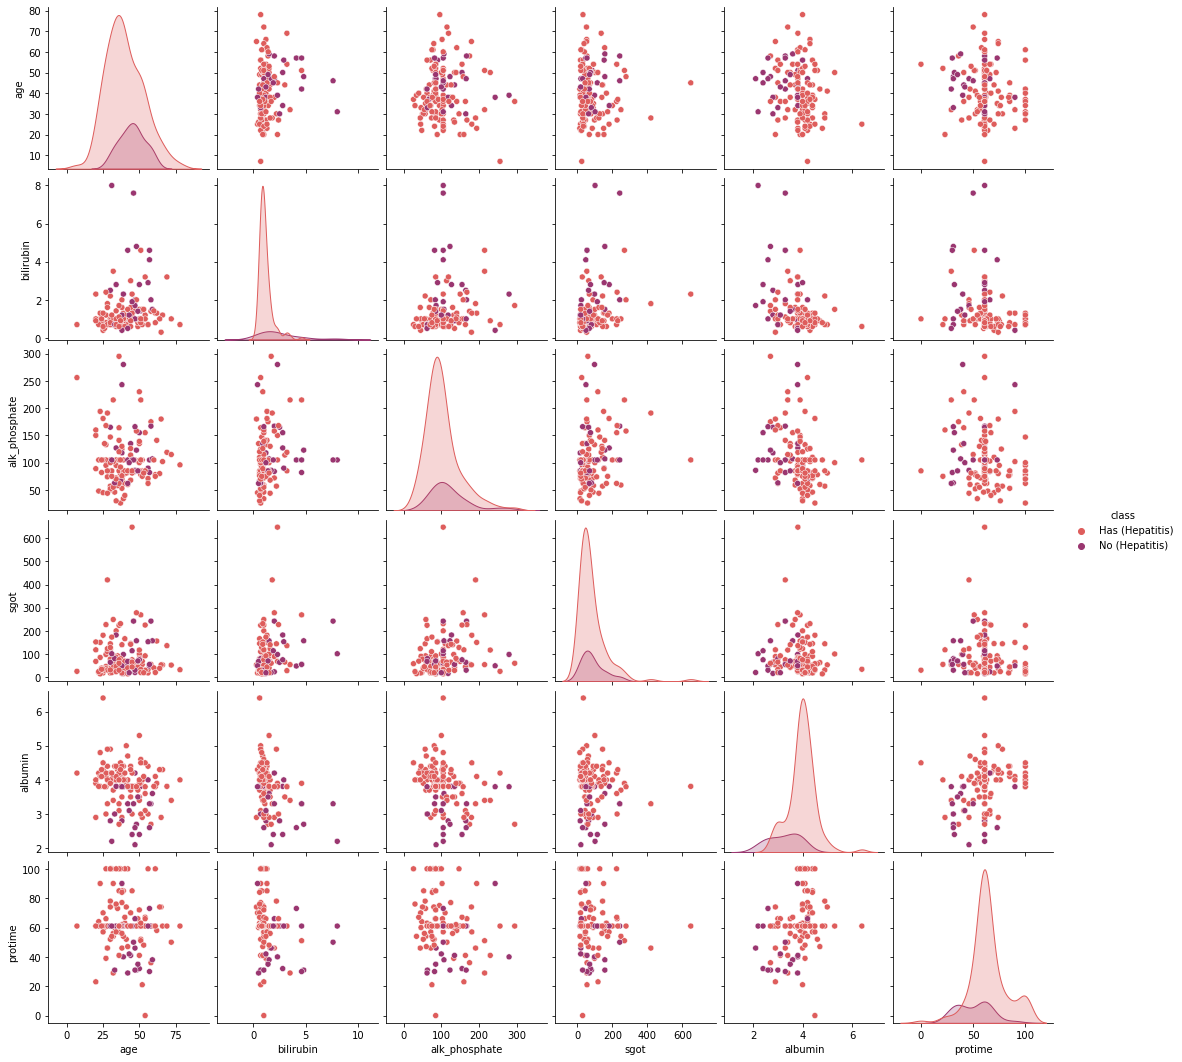

In [36]:
sns.pairplot(df3, hue = 'class', palette='flare', vars = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'])

plt.show()

**Review of age Distribution**

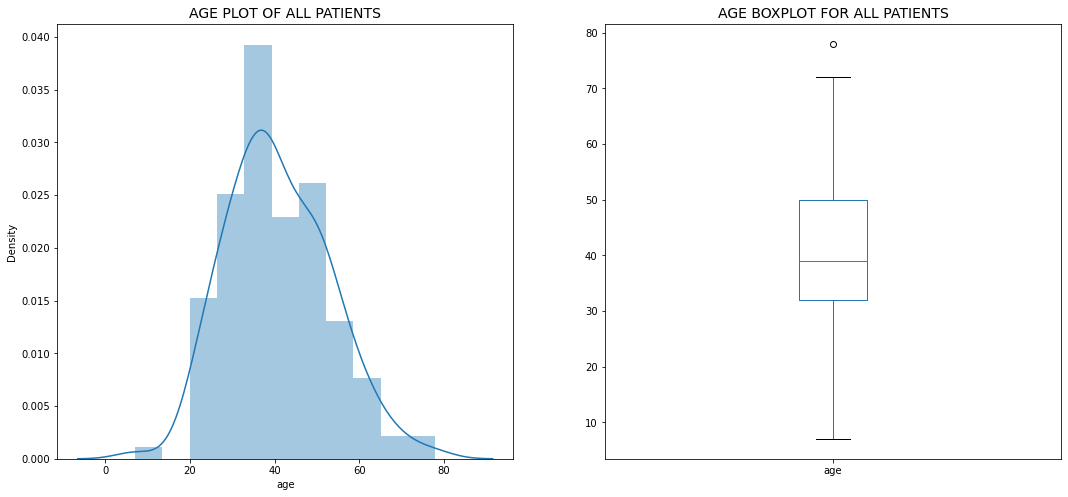

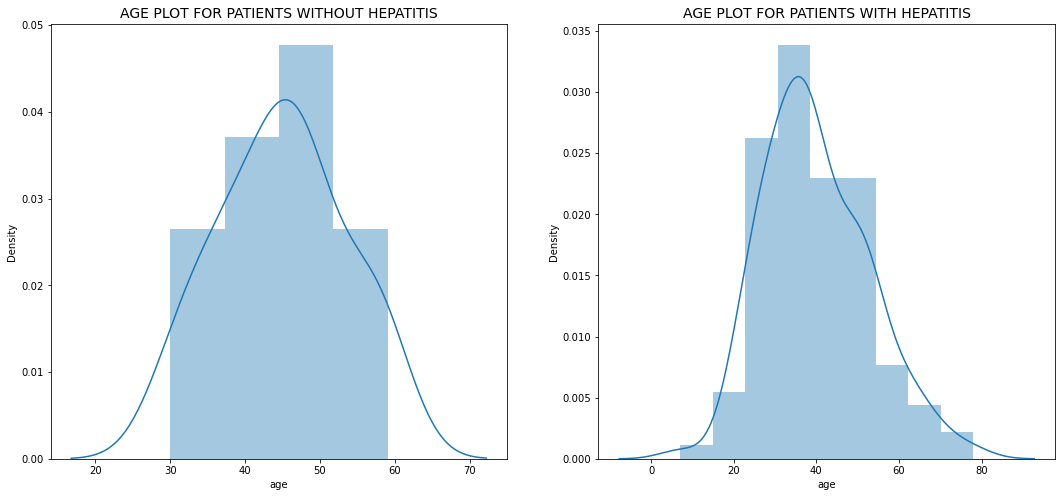

In [37]:
# plotting 'Age' for the entire distribution, into  patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df3['age'])
plt.title('AGE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df3['age'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('AGE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Age' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(class0['age'])
plt.title('AGE PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'Age' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(class1['age'])
plt.title('AGE PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light')

plt.show()

**Review of bilirubin Distribution**

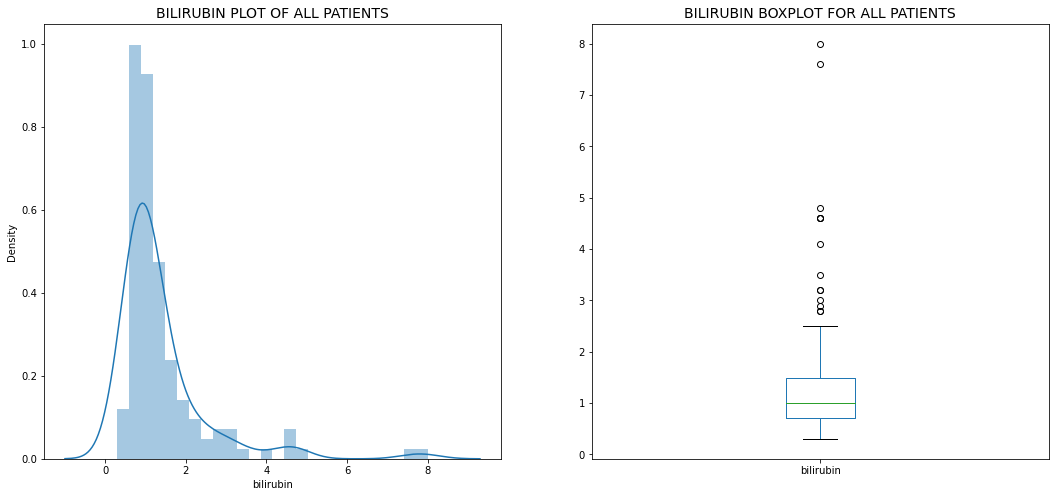

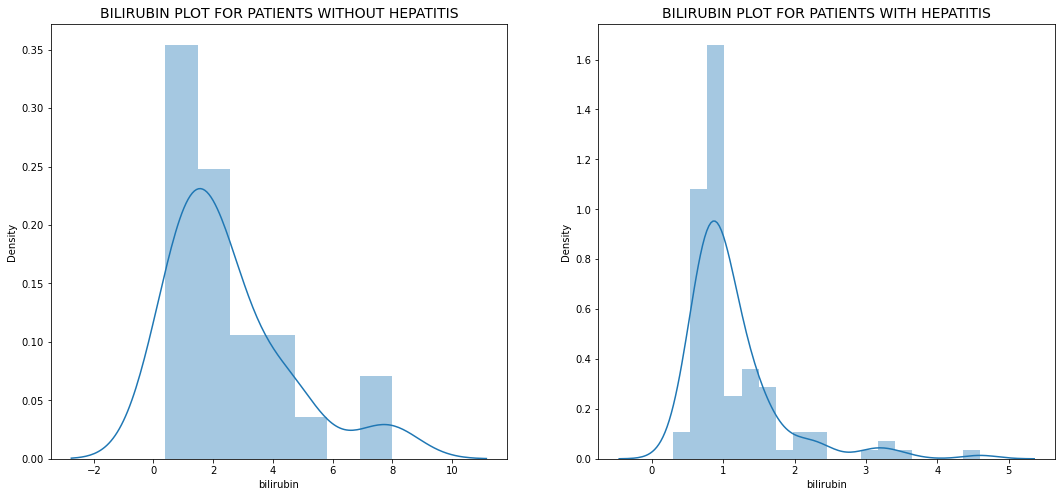

In [38]:
# plotting 'bilirubin' for the entire distribution, into  patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df3['bilirubin'])
plt.title('BILIRUBIN PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df3['bilirubin'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('BILIRUBIN BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'bilirubin' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(class0['bilirubin'])
plt.title('BILIRUBIN PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'bilirubin' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(class1['bilirubin'])
plt.title('BILIRUBIN PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light')

plt.show()

**Review of alk_phosphate Distribution**

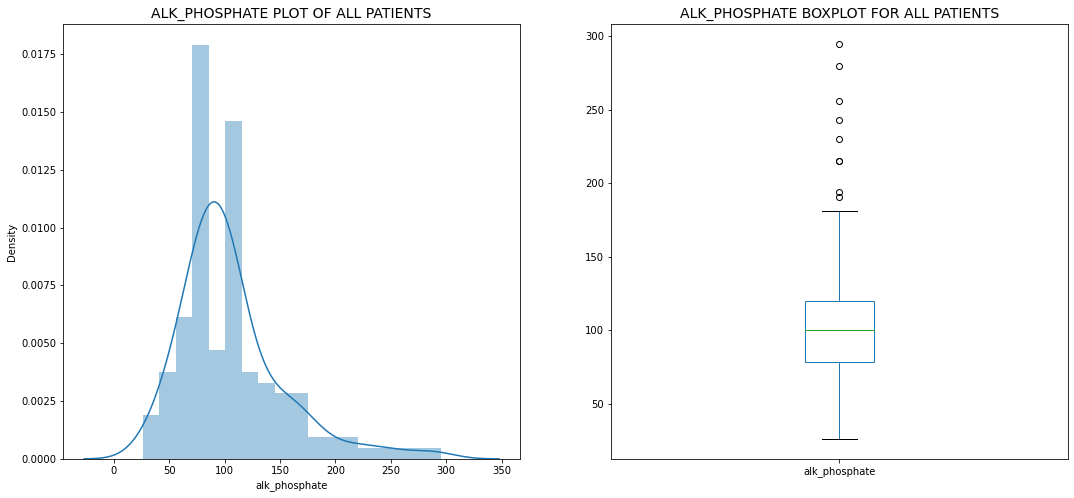

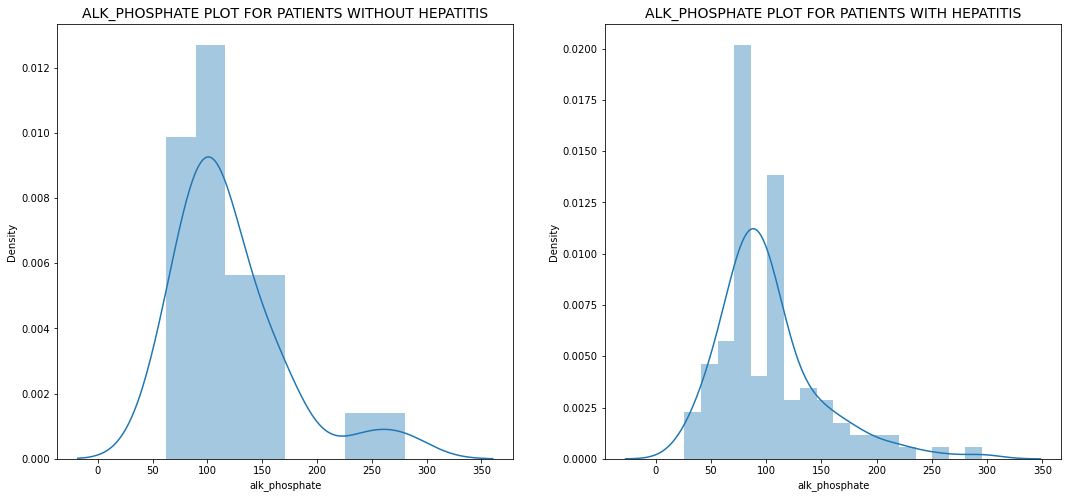

In [39]:
# plotting 'alk_phosphate' for the entire distribution, into  patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df3['alk_phosphate'])
plt.title('ALK_PHOSPHATE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df3['alk_phosphate'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('ALK_PHOSPHATE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'alk_phosphate' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(class0['alk_phosphate'])
plt.title('ALK_PHOSPHATE PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'alk_phosphate' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(class1['alk_phosphate'])
plt.title('ALK_PHOSPHATE PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light')

plt.show()

**Review of sgot Distribution**

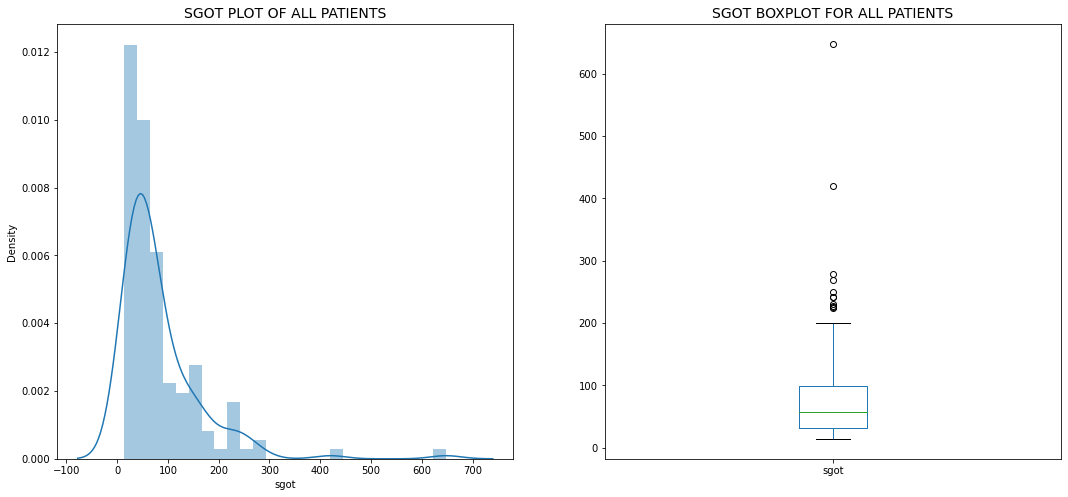

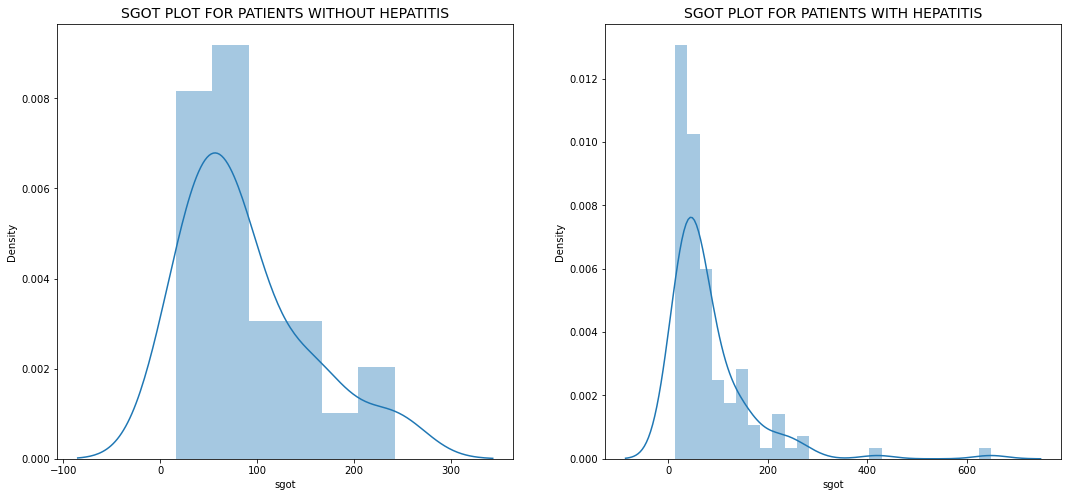

In [40]:
# plotting 'sgot' for the entire distribution, into  patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df3['sgot'])
plt.title('SGOT PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df3['sgot'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('SGOT BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'sgot' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(class0['sgot'])
plt.title('SGOT PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'sgot' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(class1['sgot'])
plt.title('SGOT PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light')

plt.show()

**Review of albumin Distribution**

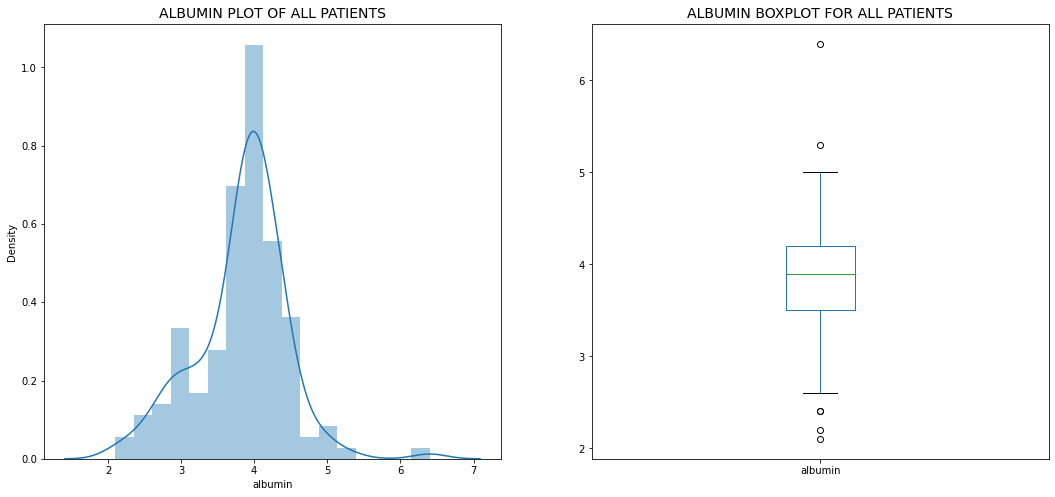

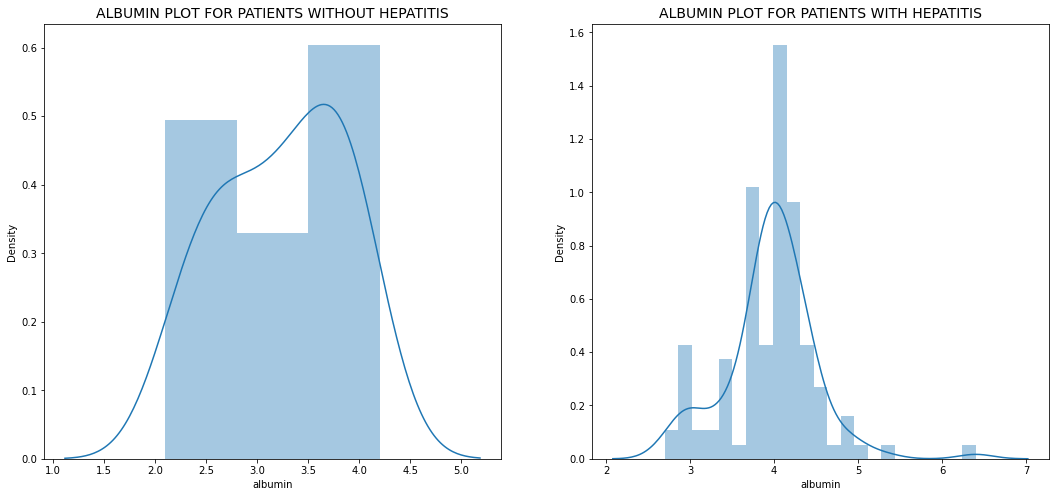

In [41]:
# plotting 'albumin' for the entire distribution, into  patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df3['albumin'])
plt.title('ALBUMIN PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df3['albumin'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('ALBUMIN BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'albumin' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(class0['albumin'])
plt.title('ALBUMIN PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'albumin' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(class1['albumin'])
plt.title('ALBUMIN PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light')

plt.show()

**Review of protime Distribution**

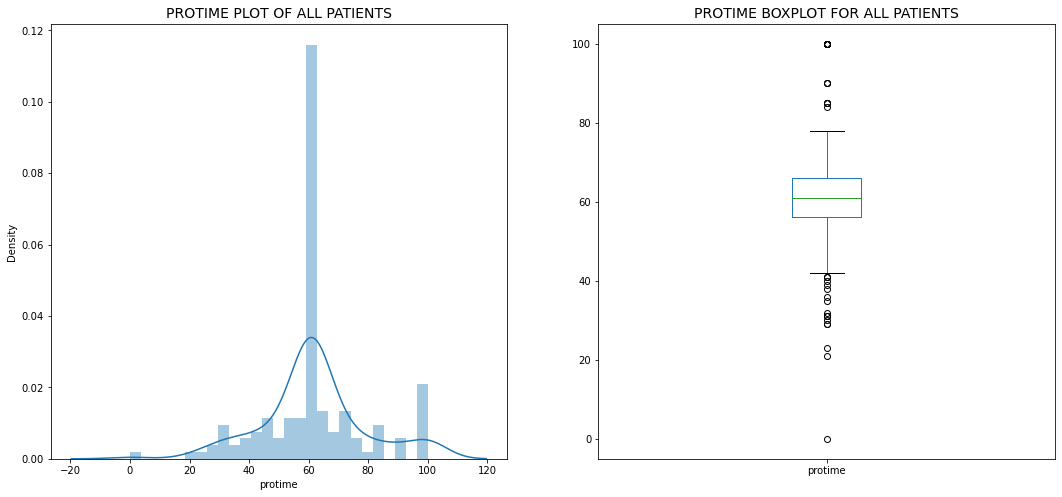

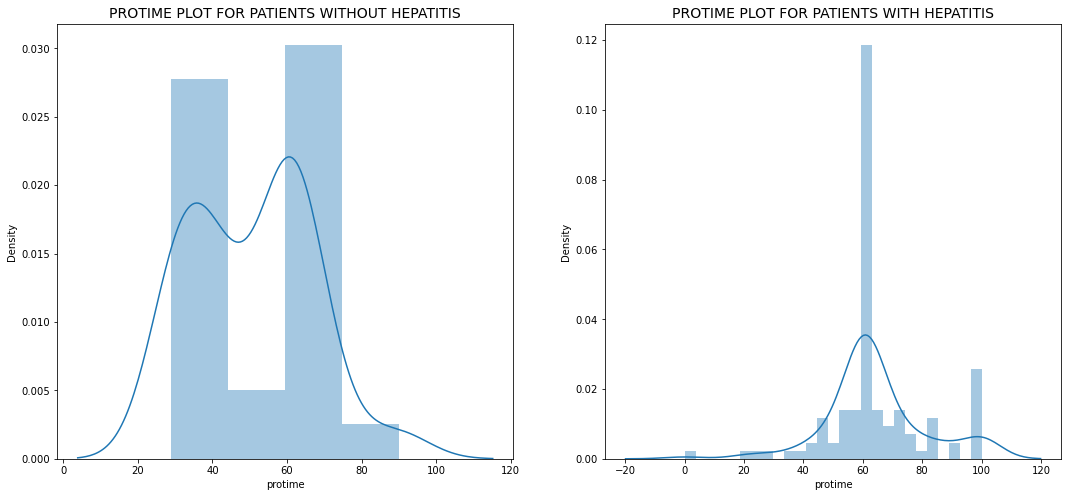

In [42]:
# plotting 'protime' for the entire distribution, into  patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df3['protime'])
plt.title('PROTIME PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df3['protime'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('PROTIME BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'protime' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(class0['protime'])
plt.title('PROTIME PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'protime' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(class1['protime'])
plt.title('PROTIME PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light')

plt.show()

# Analysis of Categorical Attributes

In [43]:
# summary statistics of categorical attributes
df3.describe(include =[np.object])

,class,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,histology
count,142,142,142,142,142,142,142,142,142,142,142,142,142,142
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Has (Hepatitis),Female,Yes (steroid),Yes (antivirals),No (fatigue),Yes (malaise),Yes (anorexia),Yes (liver_big),Yes (liver_firm),Yes (spleen_palable),Yes (spiders),Yes (ascites),Yes (varices),No (histology)
freq,116,127,73,119,91,88,113,117,83,115,95,125,125,79


**Review of Sex Distribution**

In [44]:
df3.groupby('sex').size()

sex
Female    127
Male       15
dtype: int64

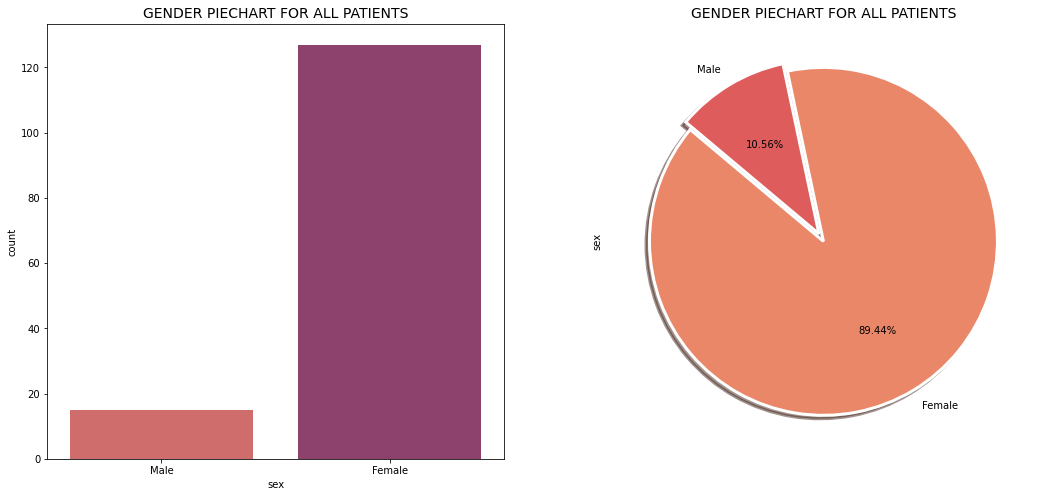

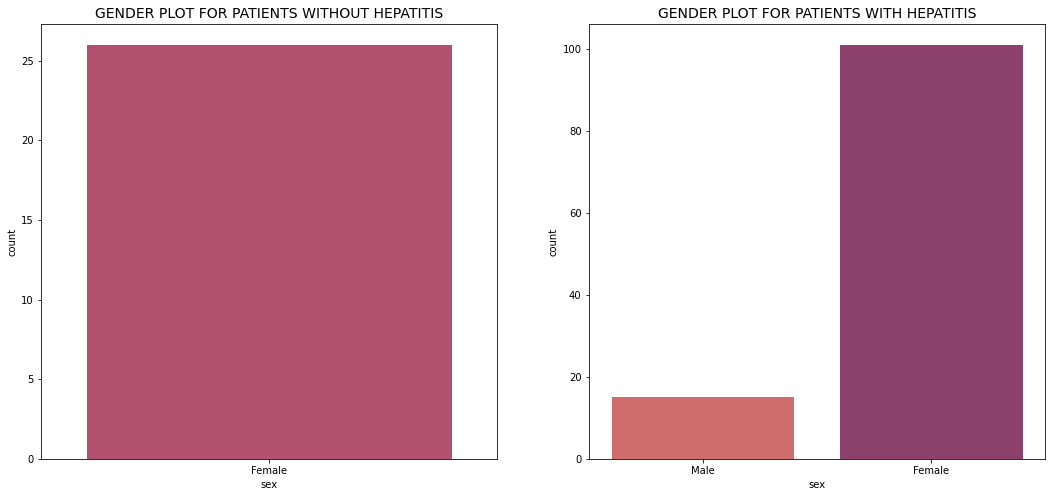

In [45]:
# plotting 'sex' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['sex'], palette='flare')
plt.title('GENDER PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["sex"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'sex' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['sex'], palette='flare')
plt.title('GENDER PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'sex' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['sex'], palette='flare')
plt.title('GENDER PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()


In [46]:
# Distribution of patients based on Sex
plot_criteria= ['sex', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
sex,,
Female,87.070000,100.000000
Male,12.930000,0.000000


**Distribution of steroid Type**

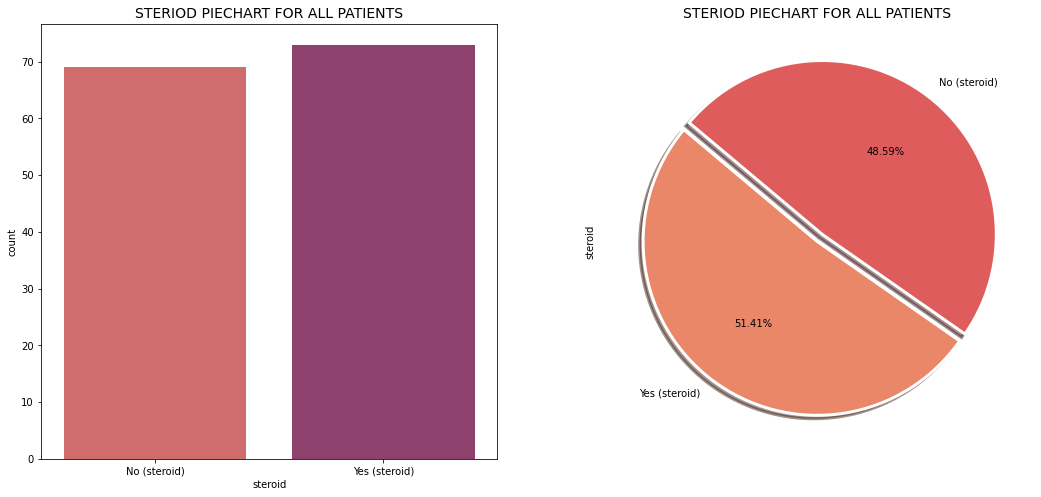

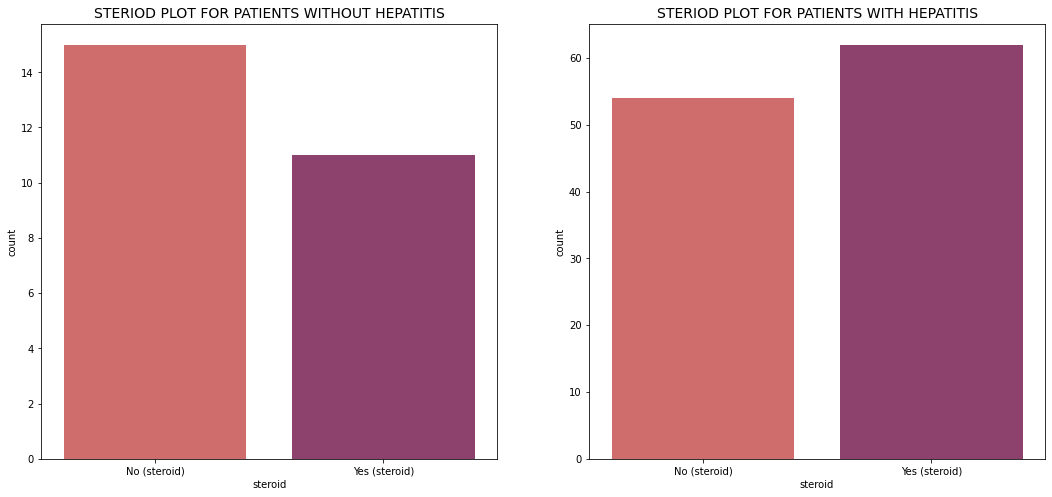

In [47]:
# plotting 'steroid' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['steroid'], palette='flare')
plt.title('STERIOD PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["steroid"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("STERIOD PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'steroid' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['steroid'], palette='flare')
plt.title('STERIOD PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'steroid' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['steroid'], palette='flare')
plt.title('STERIOD PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [48]:
# Distribution of patients based on steroid
plot_criteria= ['steroid', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
steroid,,
No (steroid),46.550000,57.690000
Yes (steroid),53.450000,42.310000


**Distribution of antivirals**

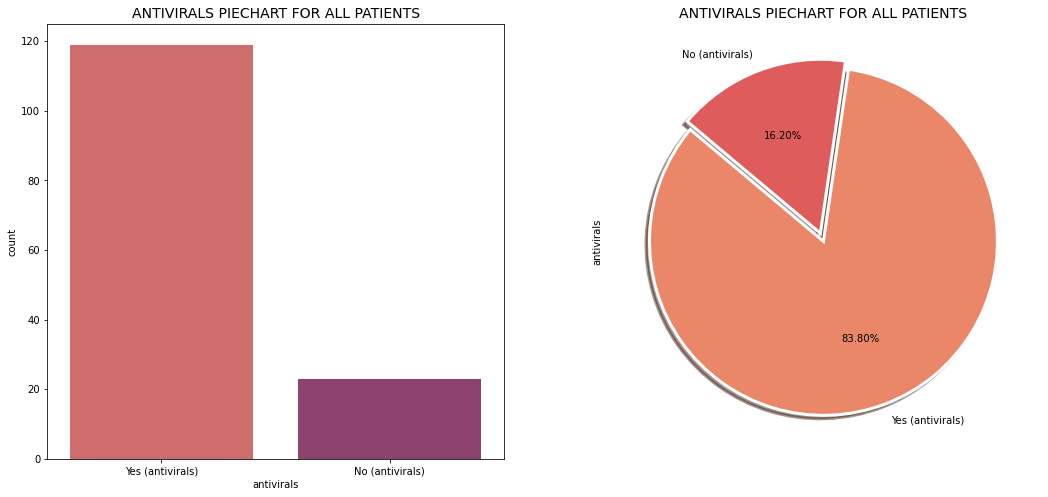

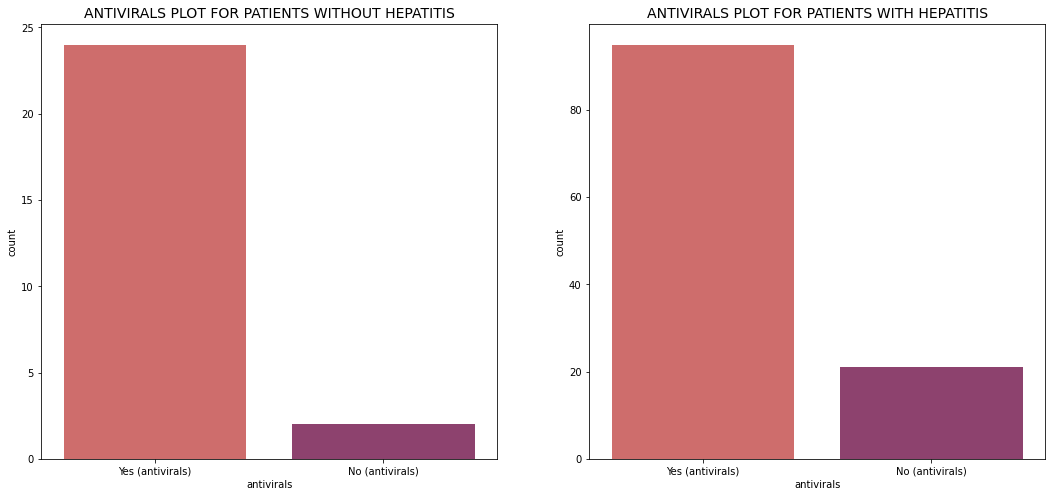

In [49]:
# plotting 'antivirals' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['antivirals'], palette='flare')
plt.title('ANTIVIRALS PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["antivirals"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("ANTIVIRALS PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'antivirals' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['antivirals'], palette='flare')
plt.title('ANTIVIRALS PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'antivirals' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['antivirals'], palette='flare')
plt.title('ANTIVIRALS PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [50]:
# Distribution of patients based on antivirals
plot_criteria= ['antivirals', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
antivirals,,
No (antivirals),18.100000,7.690000
Yes (antivirals),81.900000,92.310000


**Distribution of fatigue**

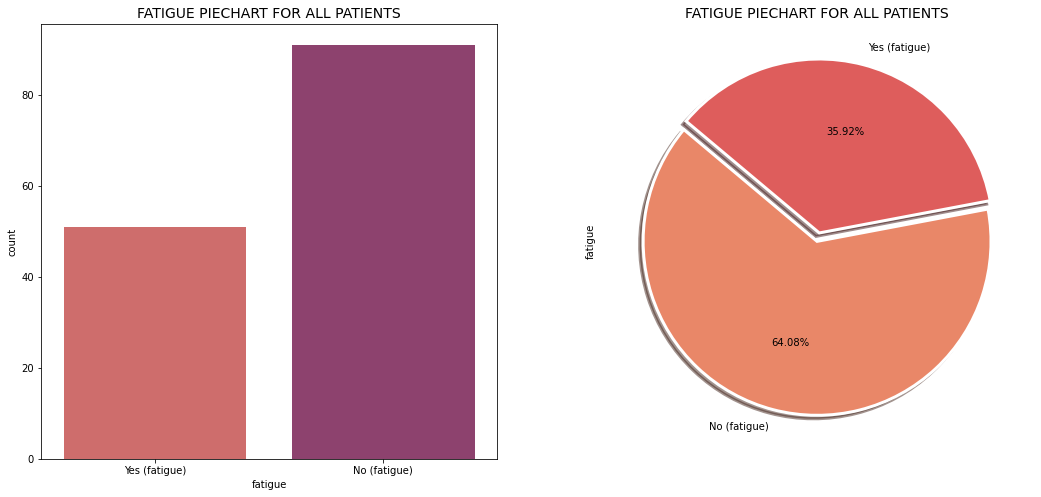

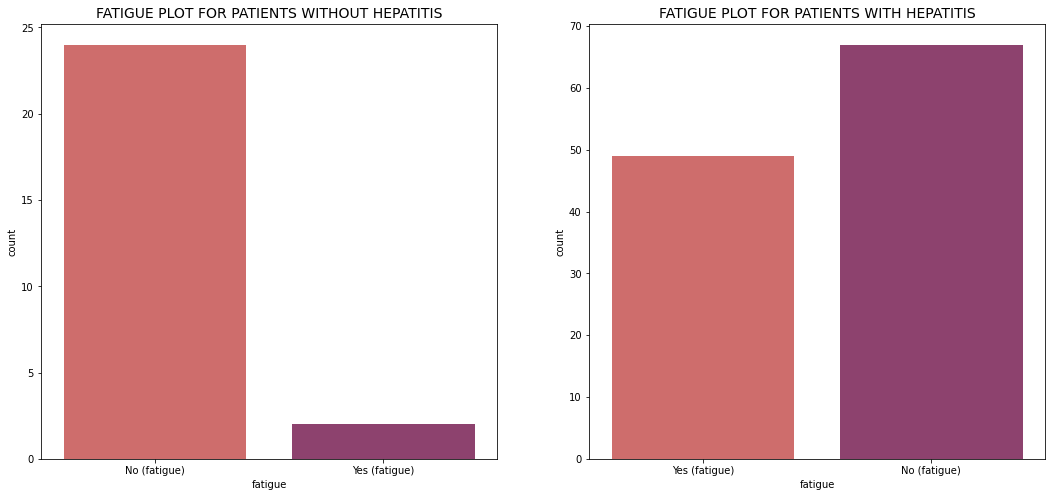

In [51]:
# plotting 'fatigue' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['fatigue'], palette='flare')
plt.title('FATIGUE PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["fatigue"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("FATIGUE PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'fatigue' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['fatigue'], palette='flare')
plt.title('FATIGUE PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'fatigue' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['fatigue'], palette='flare')
plt.title('FATIGUE PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [52]:
# Distribution of patients based on fatigue
plot_criteria= ['fatigue', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
fatigue,,
No (fatigue),57.760000,92.310000
Yes (fatigue),42.240000,7.690000


**Distribution of malaise**

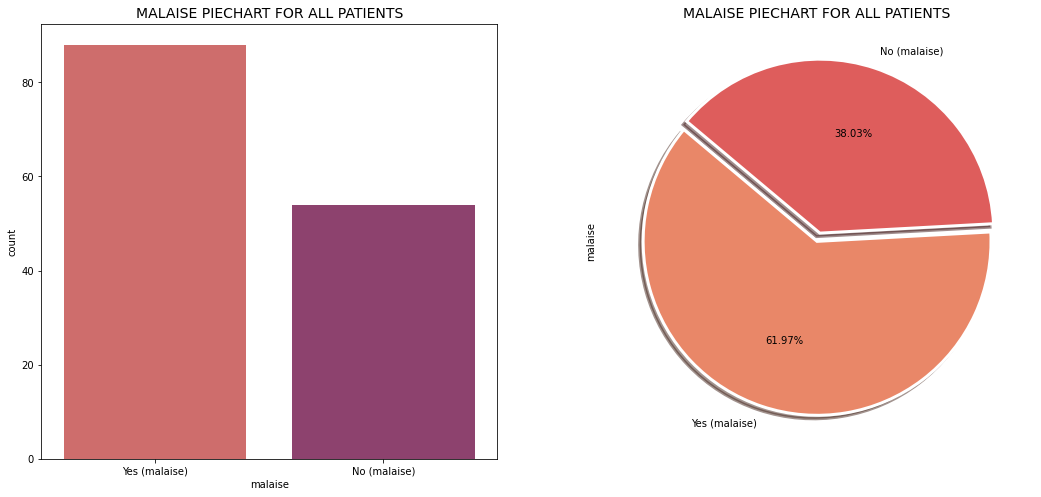

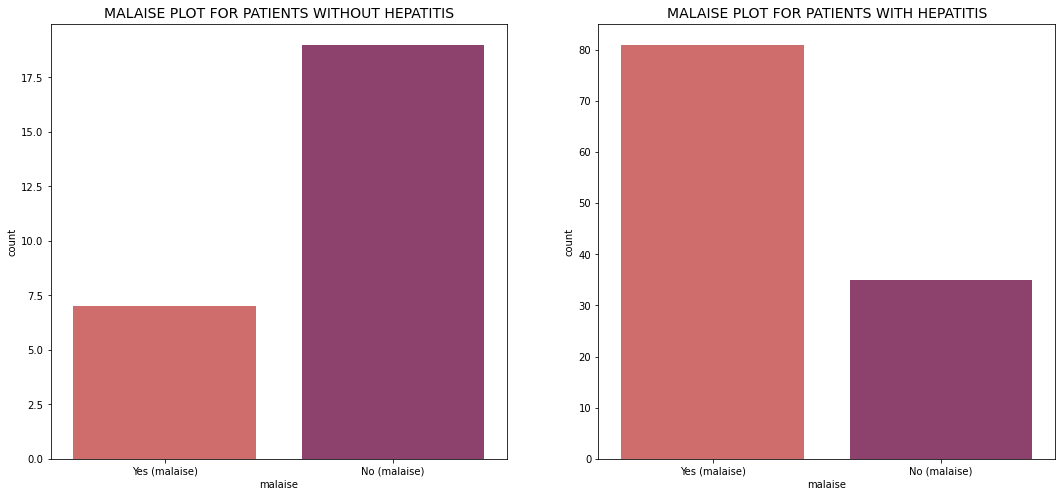

In [53]:
# plotting 'malaise' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['malaise'], palette='flare')
plt.title('MALAISE PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["malaise"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("MALAISE PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'malaise' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['malaise'], palette='flare')
plt.title('MALAISE PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'malaise' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['malaise'], palette='flare')
plt.title('MALAISE PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [54]:
# Distribution of patients based on malaise
plot_criteria= ['malaise', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
malaise,,
No (malaise),30.170000,73.080000
Yes (malaise),69.830000,26.920000


**Distribution of anorexia**

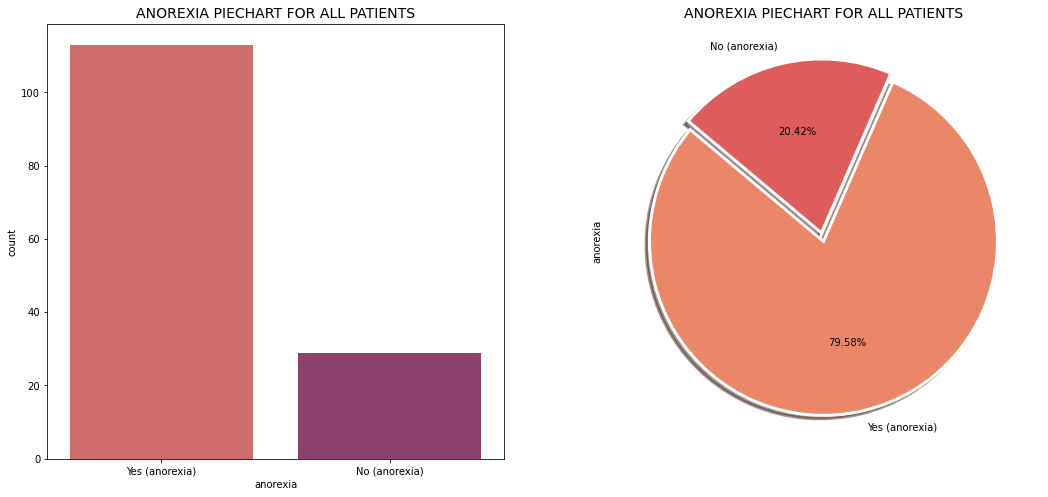

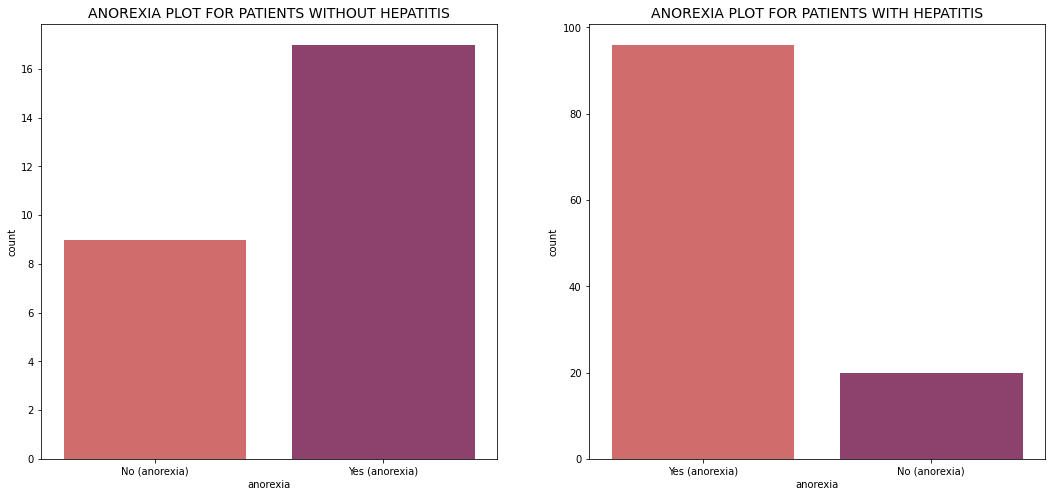

In [55]:
# plotting 'anorexia' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['anorexia'], palette='flare')
plt.title('ANOREXIA PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["anorexia"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("ANOREXIA PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'anorexia' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['anorexia'], palette='flare')
plt.title('ANOREXIA PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'anorexia' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['anorexia'], palette='flare')
plt.title('ANOREXIA PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [56]:
# Distribution of patients based on anorexia
plot_criteria= ['anorexia', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
anorexia,,
No (anorexia),17.240000,34.620000
Yes (anorexia),82.760000,65.380000


**Distribution of liver_big**

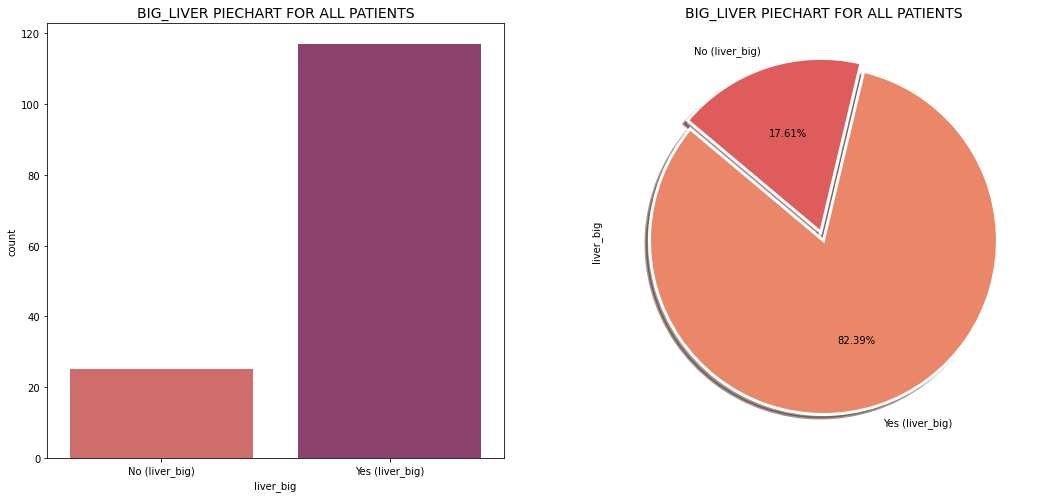

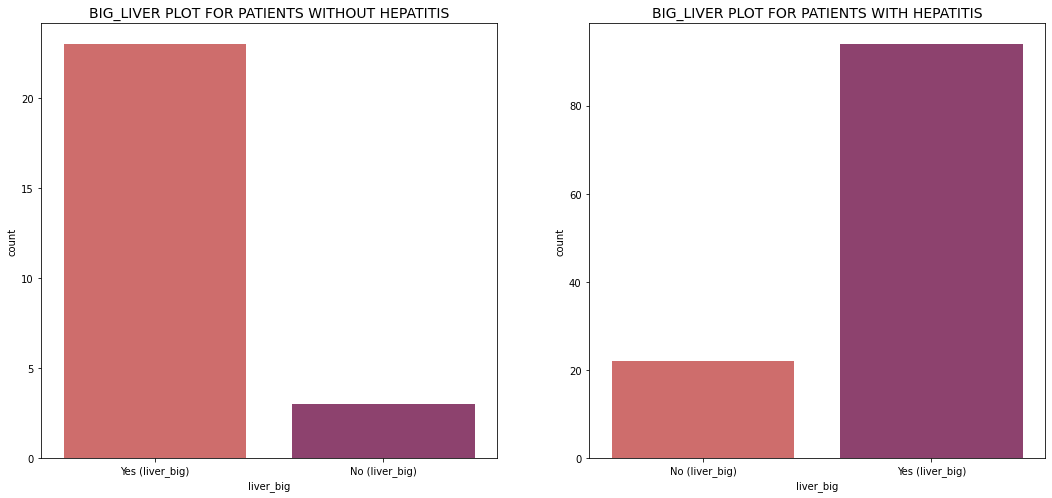

In [57]:
# plotting 'liver_big' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['liver_big'], palette='flare')
plt.title('BIG_LIVER PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["liver_big"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("BIG_LIVER PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'liver_big' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['liver_big'], palette='flare')
plt.title('BIG_LIVER PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'liver_big' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['liver_big'], palette='flare')
plt.title('BIG_LIVER PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [58]:
# Distribution of patients based on liver_big
plot_criteria= ['liver_big', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
liver_big,,
No (liver_big),18.970000,11.540000
Yes (liver_big),81.030000,88.460000


**Distribution of liver_firm**

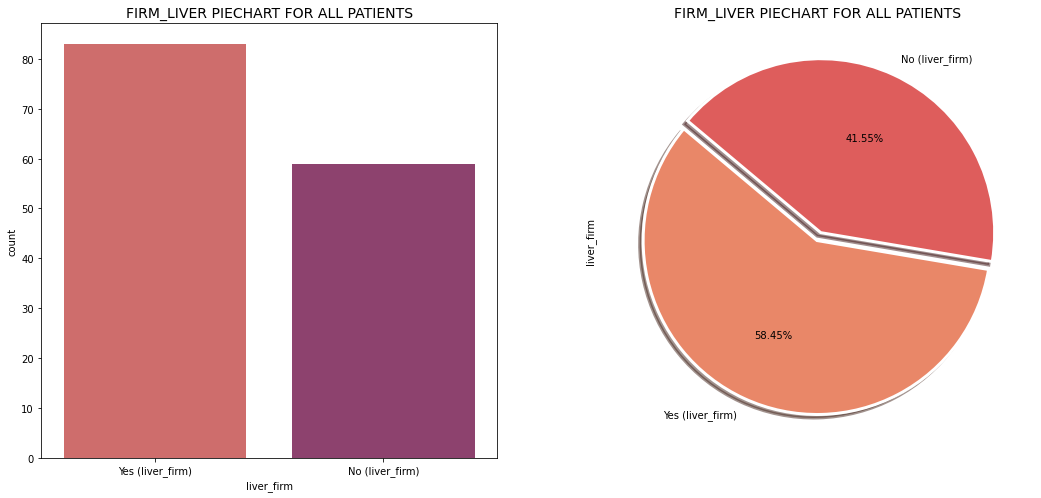

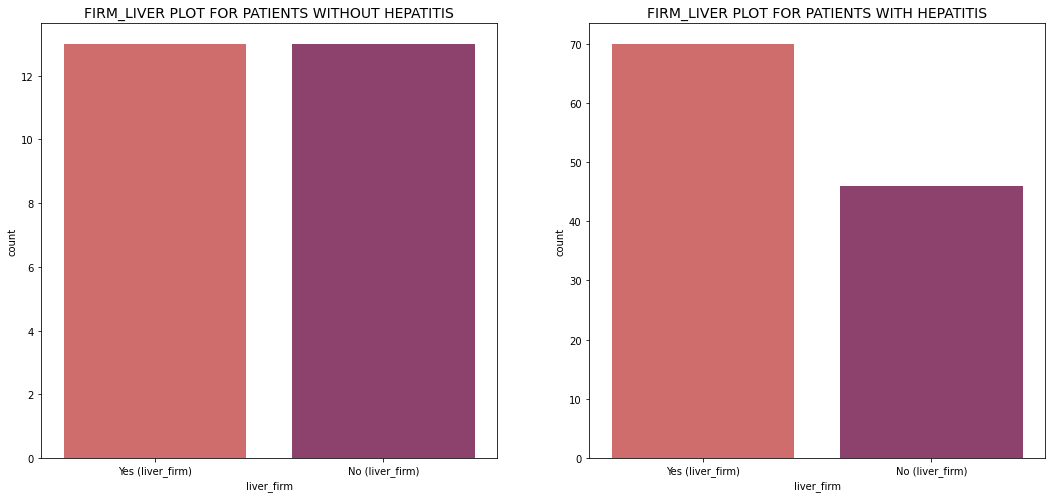

In [59]:
# plotting 'liver_firm' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['liver_firm'], palette='flare')
plt.title('FIRM_LIVER PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["liver_firm"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("FIRM_LIVER PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'liver_firm' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['liver_firm'], palette='flare')
plt.title('FIRM_LIVER PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'liver_firm' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['liver_firm'], palette='flare')
plt.title('FIRM_LIVER PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [60]:
# Distribution of patients based on liver_firm
plot_criteria= ['liver_firm', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
liver_firm,,
No (liver_firm),39.660000,50.000000
Yes (liver_firm),60.340000,50.000000


**Distribution of spleen_palable**

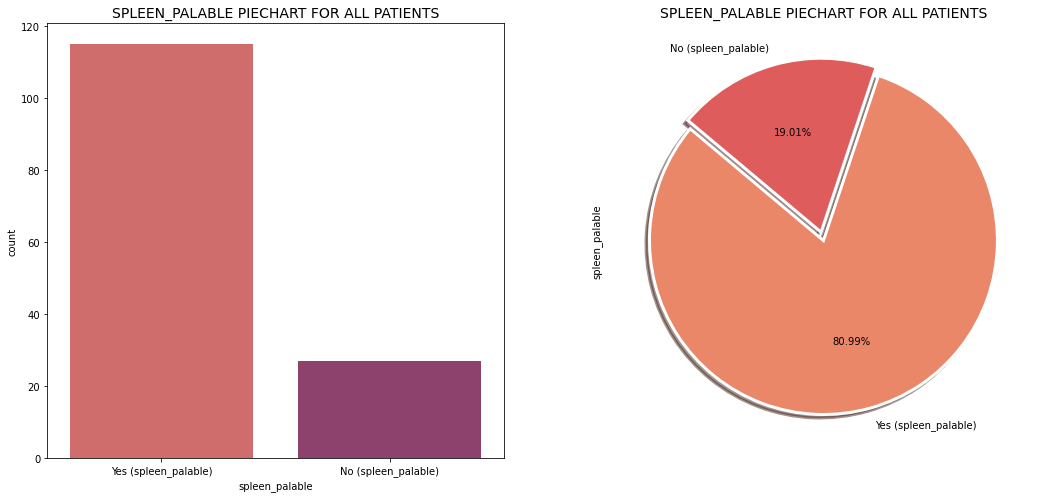

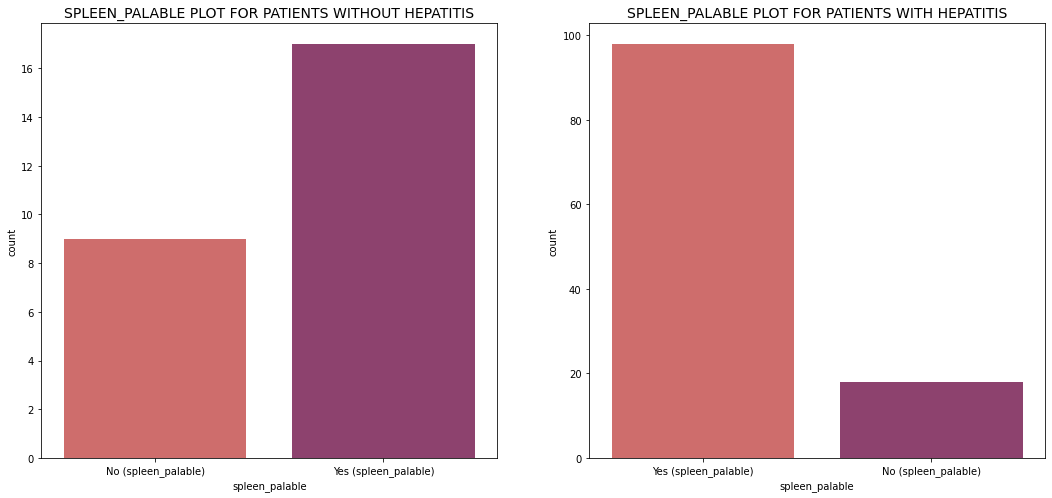

In [61]:
# plotting 'spleen_palable' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['spleen_palable'], palette='flare')
plt.title('SPLEEN_PALABLE PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["spleen_palable"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("SPLEEN_PALABLE PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'spleen_palable' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['spleen_palable'], palette='flare')
plt.title('SPLEEN_PALABLE PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'spleen_palable' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['spleen_palable'], palette='flare')
plt.title('SPLEEN_PALABLE PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [62]:
# Distribution of patients based on spleen_palable
plot_criteria= ['spleen_palable', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
spleen_palable,,
No (spleen_palable),15.520000,34.620000
Yes (spleen_palable),84.480000,65.380000


**Distribution of spiders**

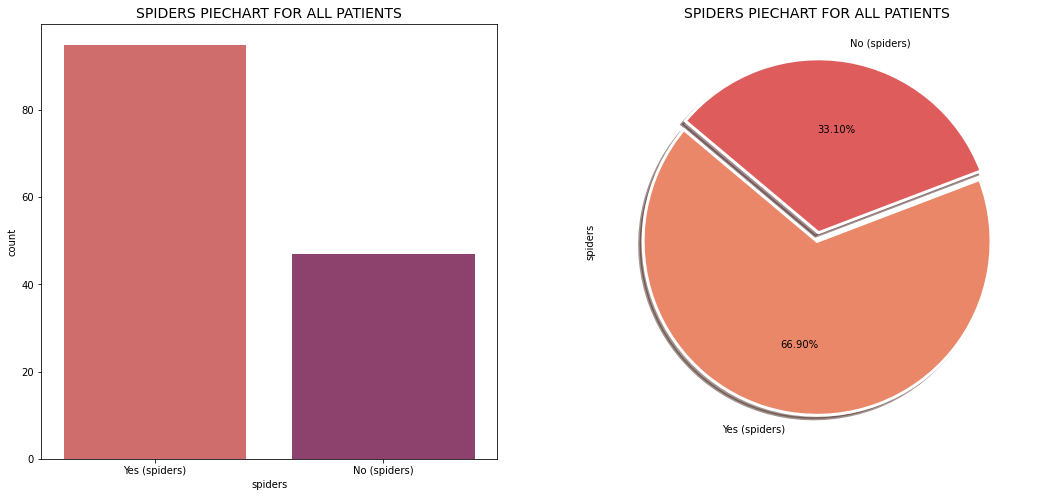

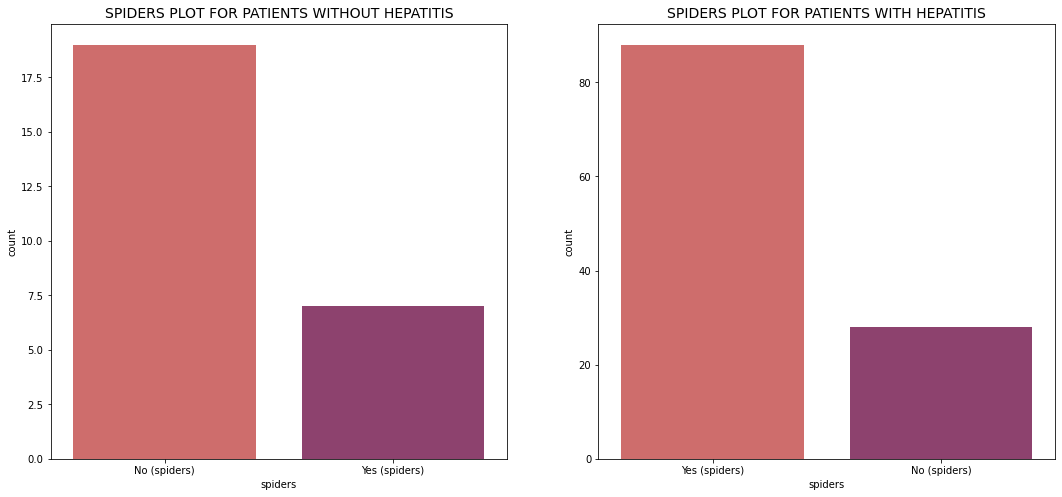

In [63]:
# plotting 'spiders' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['spiders'], palette='flare')
plt.title('SPIDERS PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["spiders"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("SPIDERS PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'spiders' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['spiders'], palette='flare')
plt.title('SPIDERS PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'spiders' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['spiders'], palette='flare')
plt.title('SPIDERS PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [64]:
# Distribution of patients based on spiders
plot_criteria= ['spiders', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
spiders,,
No (spiders),24.140000,73.080000
Yes (spiders),75.860000,26.920000


**Distribution of ascites**

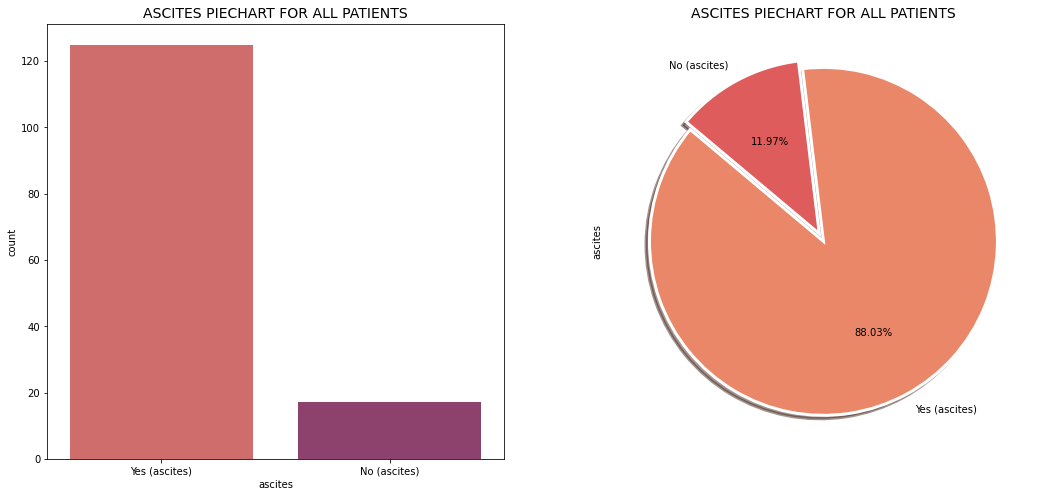

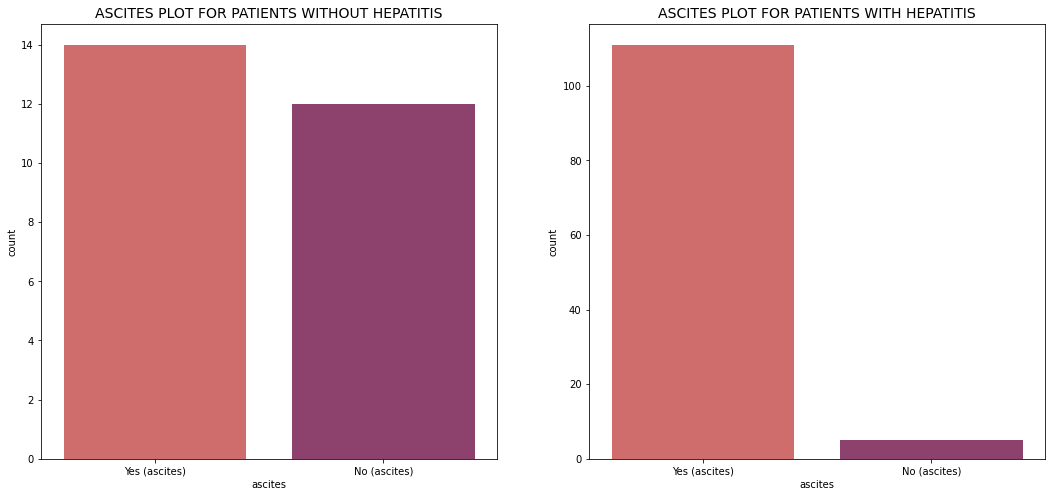

In [65]:
# plotting 'ascites' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['ascites'], palette='flare')
plt.title('ASCITES PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["ascites"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("ASCITES PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'ascites' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['ascites'], palette='flare')
plt.title('ASCITES PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'ascites' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['ascites'], palette='flare')
plt.title('ASCITES PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [66]:
# Distribution of patients based on ascites
plot_criteria= ['ascites', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
ascites,,
No (ascites),4.310000,46.150000
Yes (ascites),95.690000,53.850000


**Distribution of varices**

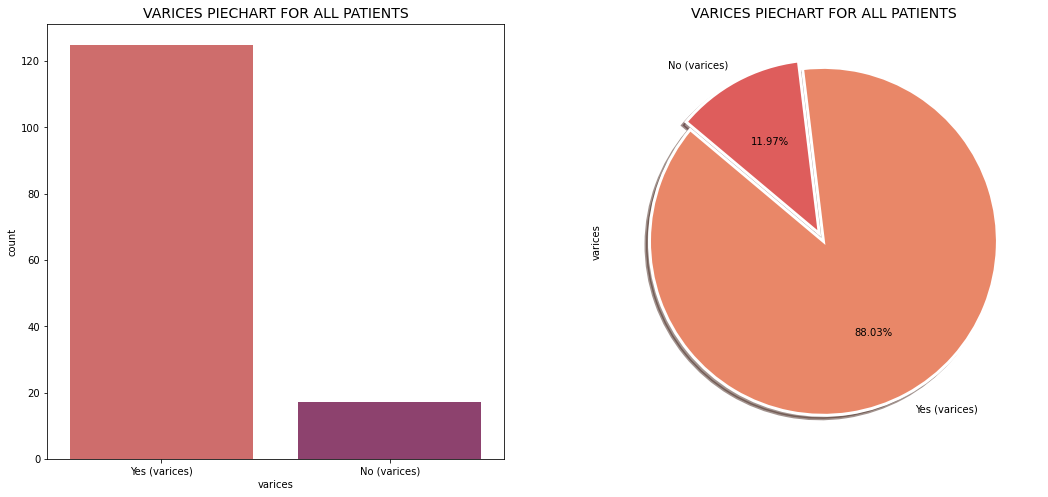

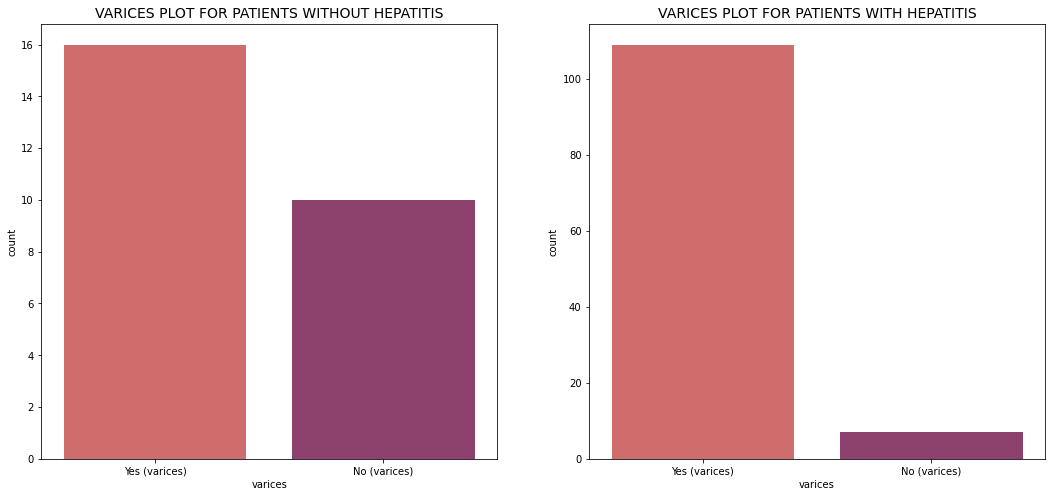

In [67]:
# plotting 'varices' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['varices'], palette='flare')
plt.title('VARICES PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["varices"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("VARICES PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'varices' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['varices'], palette='flare')
plt.title('VARICES PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'varices' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['varices'], palette='flare')
plt.title('VARICES PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [68]:
# Distribution of patients based on varices
plot_criteria= ['varices', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
varices,,
No (varices),6.030000,38.460000
Yes (varices),93.970000,61.540000


**Distribution of histology**

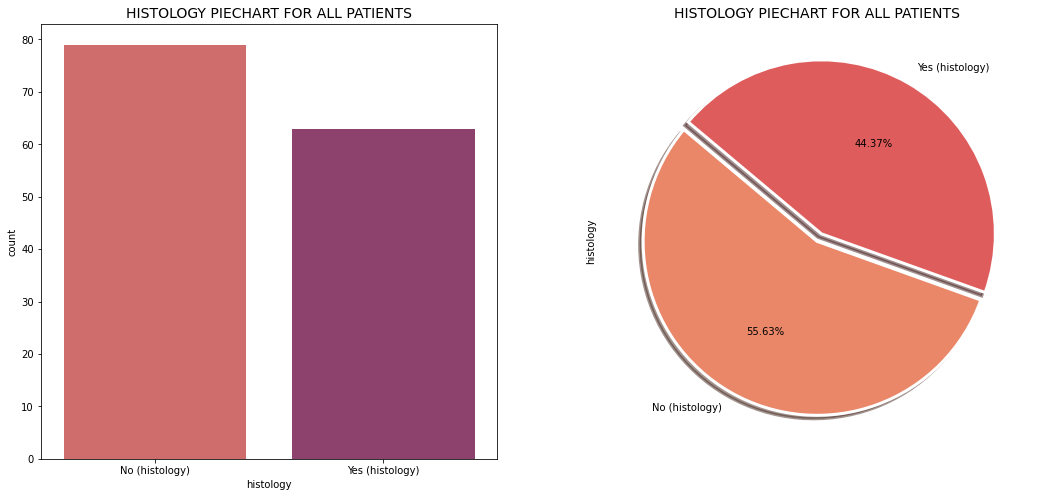

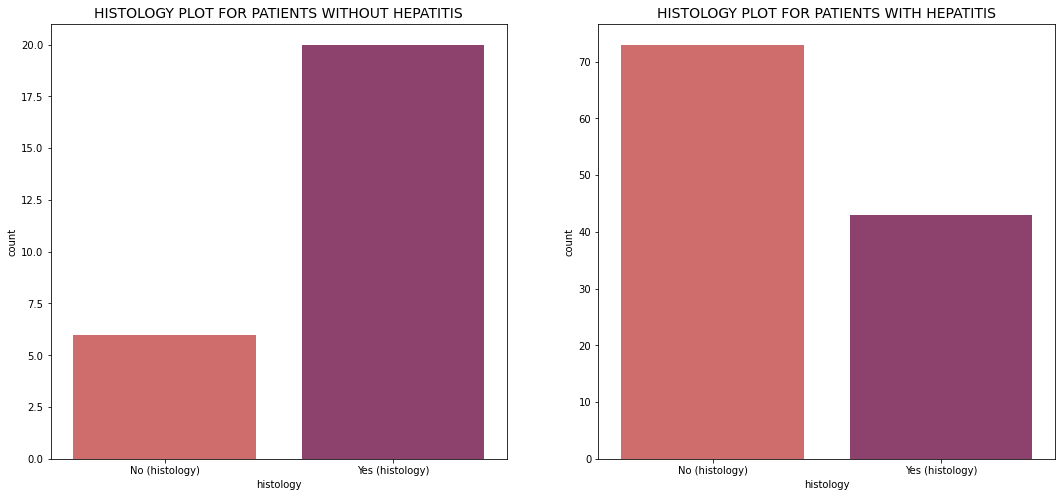

In [69]:
# plotting 'histology' for the entire distribution, into patients with and without Hepatitis

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df3['histology'], palette='flare')
plt.title('HISTOLOGY PIECHART FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df3["histology"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("flare",5),startangle = 140,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("HISTOLOGY PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'histology' for patients without Hepatitis
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(class0['histology'], palette='flare')
plt.title('HISTOLOGY PLOT FOR PATIENTS WITHOUT HEPATITIS', fontsize=14, weight='light')

# plotting 'histology' for patients with Hepatitis
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(class1['histology'], palette='flare')
plt.title('HISTOLOGY PLOT FOR PATIENTS WITH HEPATITIS', fontsize=14, weight='light' )
plt.show()

In [70]:
# Distribution of patients based on histology
plot_criteria= ['histology', 'class']
cm = sns.light_palette("darkred", as_cmap=True)
(round(pd.crosstab(df3[plot_criteria[0]], df3[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

class,Has (Hepatitis),No (Hepatitis)
histology,,
No (histology),62.930000,23.080000
Yes (histology),37.070000,76.920000


# Machine Learning Part B

In [71]:
# Python libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# ML algorithms & cross validation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Python libraries for machine learning evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import matthews_corrcoef,fbeta_score,log_loss,precision_score,f1_score,recall_score
from sklearn import metrics

from scipy import stats


Preparing the data for Model 

Feature Normalization

In [72]:
# # Converting categorical attributes to 1 & 0 for ML modelling

# df3['class'][df3['class'] == 'No Hepatitis'] = 0
# df3['class'][df3['class'] == 'Has Hepatitis'] = 1

# df3['sex'][df3['sex'] == 'Female'] = 0
# df3['sex'][df3['sex'] == 'Male'] = 1

# df3['steroid'][df3['steroid'] == 'No steroid'] = 0
# df3['steroid'][df3['steroid'] == 'Yes steroid'] = 1

# df3['antivirals'][df3['antivirals'] == 'No antivirals'] = 0
# df3['antivirals'][df3['antivirals'] == 'Yes antivirals'] = 1

# df3['fatigue'][df3['fatigue'] == 'No fatigue'] = 0
# df3['fatigue'][df3['fatigue'] == 'Yes fatigue'] = 1

# df3['malaise'][df3['malaise'] == 'No malaise'] = 0
# df3['malaise'][df3['malaise'] == 'Yes malaise'] = 1

# df3['anorexia'][df3['anorexia'] == 'No anorexia'] = 0
# df3['anorexia'][df3['anorexia'] == 'Yes anorexia'] = 1

# df3['liver_big'][df3['liver_big'] == 'No liver_big'] = 0
# df3['liver_big'][df3['liver_big'] == 'Yes liver_big'] = 1

# df3['liver_firm'][df3['liver_firm'] == 'No liver_firm'] = 0
# df3['liver_firm'][df3['liver_firm'] == 'Yes liver_firm'] = 1

# df3['spleen_palable'][df3['spleen_palable'] == 'No spleen_palable'] = 0
# df3['spleen_palable'][df3['spleen_palable'] == 'Yes spleen_palable'] = 1

# df3['spiders'][df3['spiders'] == 'No spiders'] = 0
# df3['spiders'][df3['spiders'] == 'Yes spiders'] = 1

# df3['ascites'][df3['ascites'] == 'No ascites'] = 0
# df3['ascites'][df3['ascites'] == 'Yes ascites'] = 1

# df3['varices'][df3['varices'] == 'No varices'] = 0
# df3['varices'][df3['varices'] == 'Yes varices'] = 1

# df3['histology'][df3['histology'] == 'No histology'] = 0
# df3['histology'][df3['histology'] == 'Yes histology'] = 1


# df3['class'] = df3['class'].astype(np.int64)
# df3['sex'] = df3['sex'].astype(np.int64)
# df3['steroid'] = df3['steroid'].astype(np.int64)
# df3['antivirals'] = df3['antivirals'].astype(np.int64)
# df3['fatigue'] = df3['fatigue'].astype(np.int64)
# df3['malaise'] = df3['malaise'].astype(np.int64)
# df3['anorexia'] = df3['anorexia'].astype(np.int64)
# df3['liver_big'] = df3['liver_big'].astype(np.int64)
# df3['liver_firm'] = df3['liver_firm'].astype(np.int64)
# df3['spleen_palable'] = df3['spleen_palable'].astype(np.int64)
# df3['spiders'] = df3['spiders'].astype(np.int64)
# df3['ascites'] = df3['ascites'].astype(np.int64)
# df3['varices'] = df3['varices'].astype(np.int64)
# df3['histology'] = df3['histology'].astype(np.int64)

# df3.head(2)


In [73]:
# Converting categorical attributes to 1 & 0 for ML modelling

df3['class'][df3['class'] == 'No (Hepatitis)'] = 0
df3['class'][df3['class'] == 'Has (Hepatitis)'] = 1

df3['sex'][df3['sex'] == 'Female'] = 0
df3['sex'][df3['sex'] == 'Male'] = 1

df3['steroid'][df3['steroid'] == 'No (steroid)'] = 0
df3['steroid'][df3['steroid'] == 'Yes (steroid)'] = 1

df3['antivirals'][df3['antivirals'] == 'No (antivirals)'] = 0
df3['antivirals'][df3['antivirals'] == 'Yes (antivirals)'] = 1

df3['fatigue'][df3['fatigue'] == 'No (fatigue)'] = 0
df3['fatigue'][df3['fatigue'] == 'Yes (fatigue)'] = 1

df3['malaise'][df3['malaise'] == 'No (malaise)'] = 0
df3['malaise'][df3['malaise'] == 'Yes (malaise)'] = 1

df3['anorexia'][df3['anorexia'] == 'No (anorexia)'] = 0
df3['anorexia'][df3['anorexia'] == 'Yes (anorexia)'] = 1

df3['liver_big'][df3['liver_big'] == 'No (liver_big)'] = 0
df3['liver_big'][df3['liver_big'] == 'Yes (liver_big)'] = 1

df3['liver_firm'][df3['liver_firm'] == 'No (liver_firm)'] = 0
df3['liver_firm'][df3['liver_firm'] == 'Yes (liver_firm)'] = 1

df3['spleen_palable'][df3['spleen_palable'] == 'No (spleen_palable)'] = 0
df3['spleen_palable'][df3['spleen_palable'] == 'Yes (spleen_palable)'] = 1

df3['spiders'][df3['spiders'] == 'No (spiders)'] = 0
df3['spiders'][df3['spiders'] == 'Yes (spiders)'] = 1

df3['ascites'][df3['ascites'] == 'No (ascites)'] = 0
df3['ascites'][df3['ascites'] == 'Yes (ascites)'] = 1

df3['varices'][df3['varices'] == 'No (varices)'] = 0
df3['varices'][df3['varices'] == 'Yes (varices)'] = 1

df3['histology'][df3['histology'] == 'No (histology)'] = 0
df3['histology'][df3['histology'] == 'Yes (histology)'] = 1



df3['class'] = df3['class'].astype(np.int64)
df3['sex'] = df3['sex'].astype(np.int64)
df3['steroid'] = df3['steroid'].astype(np.int64)
df3['antivirals'] = df3['antivirals'].astype(np.int64)
df3['fatigue'] = df3['fatigue'].astype(np.int64)
df3['malaise'] = df3['malaise'].astype(np.int64)
df3['anorexia'] = df3['anorexia'].astype(np.int64)
df3['liver_big'] = df3['liver_big'].astype(np.int64)
df3['liver_firm'] = df3['liver_firm'].astype(np.int64)
df3['spleen_palable'] = df3['spleen_palable'].astype(np.int64)
df3['spiders'] = df3['spiders'].astype(np.int64)
df3['ascites'] = df3['ascites'].astype(np.int64)
df3['varices'] = df3['varices'].astype(np.int64)
df3['histology'] = df3['histology'].astype(np.int64)


df3.head(2)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,1,30,1,0,1,1,1,1,0,1,1,1,1,1,1.0,85,18,4.0,61,0
1,1,50,0,0,1,0,1,1,0,1,1,1,1,1,0.9,135,42,3.5,61,0


In [74]:
#Going back to original 'dt' dataframe for the application of Machine learning techniques
#df_ml = pd.read_csv('heart_ML.csv')

In [75]:
# checking shape of dataset after outlier removal
df3.shape

(142, 20)

In [76]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','bilirubin','alk_phosphate','sgot','albumin','protime']
df3[columns_to_scale] = StandardScaler.fit_transform(df3[columns_to_scale])

In [77]:
df3.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,1,-0.890559,1,0,1,1,1,1,0,1,1,1,1,1,-0.329451,-0.437381,-0.797631,0.275208,-0.039935,0
1,1,0.756048,0,0,1,0,1,1,0,1,1,1,1,1,-0.415479,0.621762,-0.505401,-0.536582,-0.039935,0
2,1,3.061298,0,1,1,0,1,1,1,1,1,1,1,1,-0.587535,-0.204370,-0.627163,0.275208,-0.039935,0
3,1,-0.561238,0,1,1,1,1,1,1,1,1,1,1,1,-0.329451,-0.013724,1.418449,0.275208,-0.039935,0
4,1,-0.561238,0,1,1,1,1,1,1,1,1,1,1,1,-0.415479,-0.225553,-0.675869,0.275208,0.753972,0


In [78]:
#seperating 'goal' variable from other features
X3 = df3.drop(['class'], axis=1) 
y3 = df3['class']

In [79]:
X3.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,-0.890559,1,0,1,1,1,1,0,1,1,1,1,1,-0.329451,-0.437381,-0.797631,0.275208,-0.039935,0
1,0.756048,0,0,1,0,1,1,0,1,1,1,1,1,-0.415479,0.621762,-0.505401,-0.536582,-0.039935,0
2,3.061298,0,1,1,0,1,1,1,1,1,1,1,1,-0.587535,-0.204370,-0.627163,0.275208,-0.039935,0
3,-0.561238,0,1,1,1,1,1,1,1,1,1,1,1,-0.329451,-0.013724,1.418449,0.275208,-0.039935,0
4,-0.561238,0,1,1,1,1,1,1,1,1,1,1,1,-0.415479,-0.225553,-0.675869,0.275208,0.753972,0


In [80]:
y3.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

REchecking Correlation

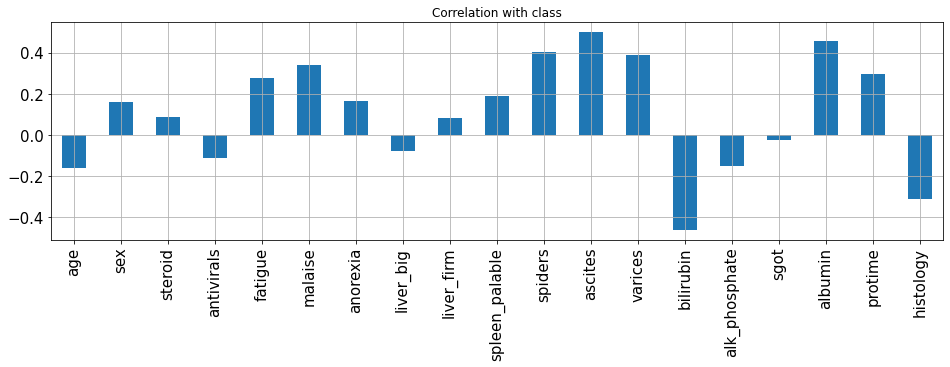

In [81]:
#Correlation with Response Variable class

X3.corrwith(y3).plot.bar(
        figsize = (16, 4), title = "Correlation with class", fontsize = 15,
        rot = 90, grid = True)
plt.show()

In [82]:
X_train3, X_test3,y_train3, y_test3=train_test_split(X3,y3,test_size=0.3,random_state=40)

In [83]:
## checking distribution of Class variable in train test split
print(' ')
print('*****************************************************')
print("------'X3' & 'y3' Test & Train Sizes-------------------")
print('*****************************************************')
print('X_train3 Size = ', X_train3.size, '::::: X_test3 Size = ',X_test3.size)
print('y_train3 Size = ', y_train3.size, ' ::::: y_test3 Size = ', y_test3.size)

print(' ')

print('*****************************************************')
print('*****************************************************')

print('Distribution of Class variable in training set')
print(y_train3.value_counts())

print('Distribution of Class variable in test set')
print(y_test3.value_counts())

 
*****************************************************
------'X3' & 'y3' Test & Train Sizes-------------------
*****************************************************
X_train3 Size =  1881 ::::: X_test3 Size =  817
y_train3 Size =  99  ::::: y_test3 Size =  43
 
*****************************************************
*****************************************************
Distribution of Class variable in training set
1    82
0    17
Name: class, dtype: int64
Distribution of Class variable in test set
1    34
0     9
Name: class, dtype: int64


In [84]:
print('*****************************************************')

print('Shape of "Training Set3" X_train3 and Y_train3')
print('X_train3 = ', X_train3.shape, ' ::::: y_train3 = ', y_train3.shape)
print(' ')
print('*****************************************************')
print('*****************************************************')

print('Shape of "Test Sets3" X_test3 and Y_test3')
print('X_test3  =  ', X_test3.shape, ' ::::: y_test3 = ', y_test3.shape)
print(' ')
print('*****************************************************')

*****************************************************
Shape of "Training Set3" X_train3 and Y_train3
X_train3 =  (99, 19)  ::::: y_train3 =  (99,)
 
*****************************************************
*****************************************************
Shape of "Test Sets3" X_test3 and Y_test3
X_test3  =   (43, 19)  ::::: y_test3 =  (43,)
 
*****************************************************


# Cross Validation of Models

In [85]:
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel3():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000, eval_metric='mlogloss')))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100, eval_metric='mlogloss')))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000, eval_metric='mlogloss')))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [86]:
# function for performing 10-fold cross validation of all the baseline models
def BasedLine3(X_train3, y_train3,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train3, y_train3, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [87]:
models = GetBasedModel3()
names,results = BasedLine3(X_train3, y_train3,models)

LR_L2: 0.838889 (0.110805)
LDA: 0.808889 (0.103494)
KNN7: 0.848889 (0.101980)
KNN5: 0.870000 (0.090000)
KNN9: 0.858889 (0.101598)
KNN11: 0.838889 (0.110805)
CART: 0.838889 (0.101379)
NB: 0.570000 (0.219317)
SVM Linear: 0.798889 (0.108577)
SVM RBF: 0.848889 (0.111355)
AB: 0.827778 (0.101379)
GBM: 0.848889 (0.101980)
RF_Ent100: 0.868889 (0.045216)
RF_Gini100: 0.850000 (0.120416)
ET100: 0.838889 (0.079232)
ET500: 0.838889 (0.101379)
MLP: 0.828889 (0.099778)
SGD3000: 0.798889 (0.108577)
XGB_2000: 0.818889 (0.124231)
XGB_500: 0.818889 (0.124231)
XGB_100: 0.840000 (0.111355)
XGB_1000: 0.818889 (0.124231)
ET1000: 0.848889 (0.091652)


# MODELS

# Logistics Regression

In [88]:
Lreg3 = LogisticRegression()
Lreg3.fit(X_train3, y_train3)
y_pred_Lreg3 = Lreg3.predict(X_test3)

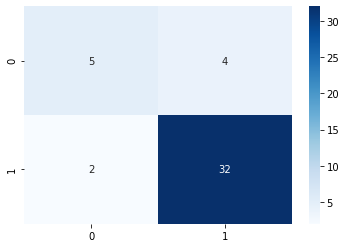

In [89]:
cm=confusion_matrix(y_test3,y_pred_Lreg3)
sns.heatmap(cm, annot=True,cmap='Blues')
#sns.heatmap(cm, annot=True,cmap='Blues', figsize=(18,6))
plt.show()

In [90]:
accuracy_score(y_test3,y_pred_Lreg3)

0.8604651162790697

In [91]:
print(classification_report(y_test3, y_pred_Lreg3))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.89      0.94      0.91        34

    accuracy                           0.86        43
   macro avg       0.80      0.75      0.77        43
weighted avg       0.85      0.86      0.85        43



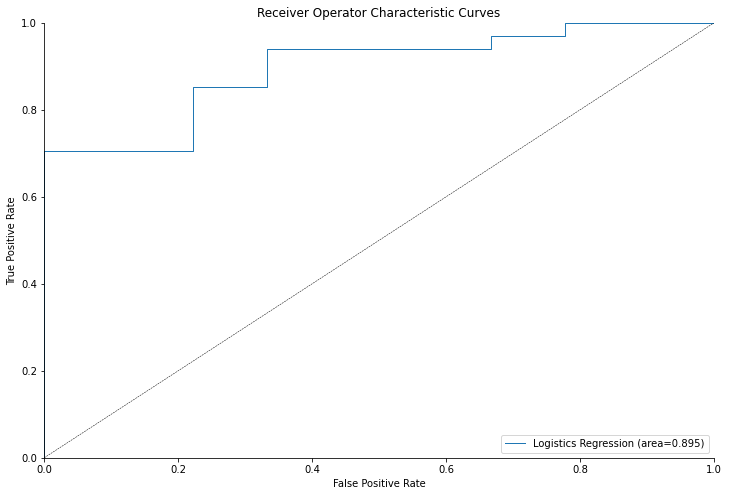

In [92]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,Lreg3.predict_proba(X_test3),label='Logistics Regression',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

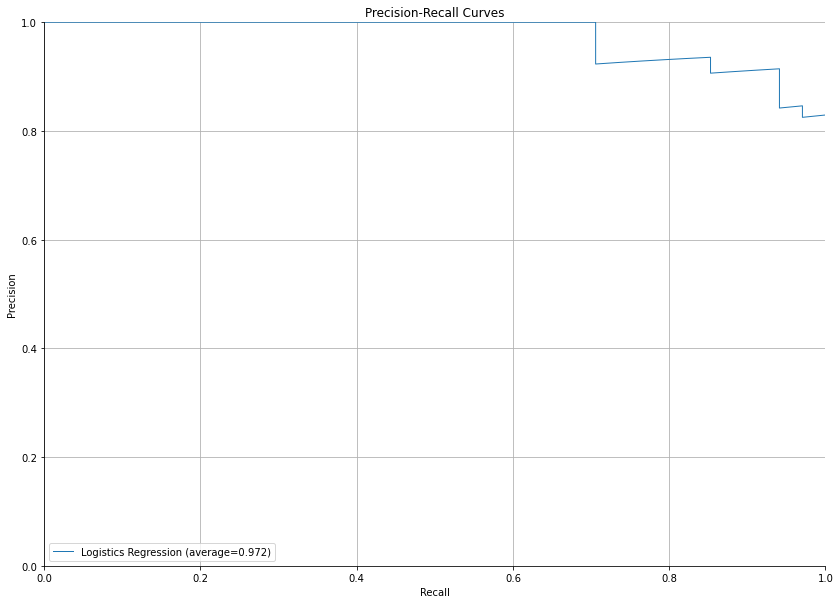

In [93]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test3,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test3, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,Lreg3.predict_proba(X_test3),label='Logistics Regression',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Random Forest Classifier (criterion = 'entropy')

In [94]:
rf_ent3 = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent3.fit(X_train3, y_train3)
y_pred_rfe3 = rf_ent3.predict(X_test3)

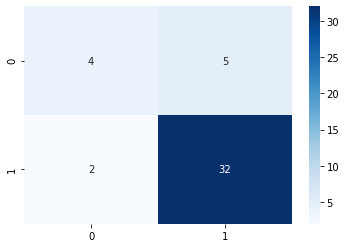

In [95]:
cm=confusion_matrix(y_test3,y_pred_rfe3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [96]:
accuracy_score(y_test3,y_pred_rfe3)

0.8372093023255814

In [97]:
print(classification_report(y_test3, y_pred_rfe3))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.86      0.94      0.90        34

    accuracy                           0.84        43
   macro avg       0.77      0.69      0.72        43
weighted avg       0.82      0.84      0.82        43



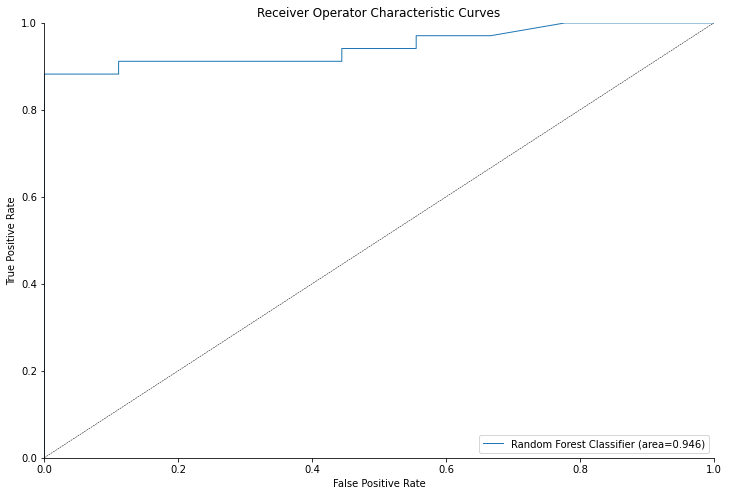

In [98]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,rf_ent3.predict_proba(X_test3),label='Random Forest Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

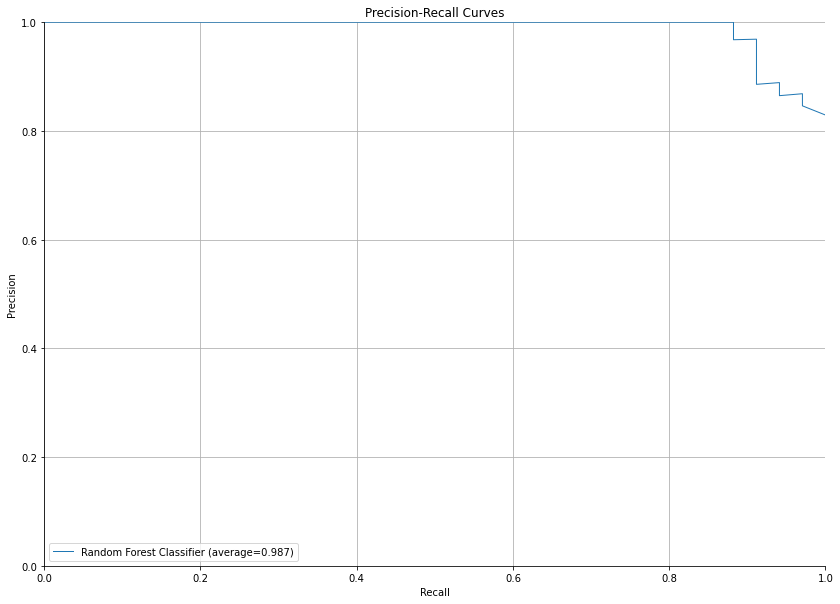

In [99]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,rf_ent3.predict_proba(X_test3),label='Random Forest Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Multi Layer Perceptron

In [100]:
mlp3 = MLPClassifier()
mlp3.fit(X_train3,y_train3)
y_pred_mlp3 = mlp3.predict(X_test3)

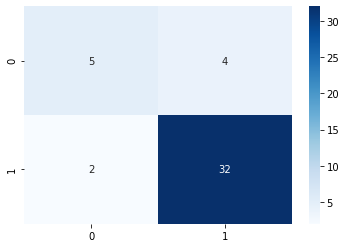

In [101]:
cm=confusion_matrix(y_test3,y_pred_mlp3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [102]:
accuracy_score(y_test3,y_pred_mlp3)

0.8604651162790697

In [103]:
print(classification_report(y_test3, y_pred_mlp3))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.89      0.94      0.91        34

    accuracy                           0.86        43
   macro avg       0.80      0.75      0.77        43
weighted avg       0.85      0.86      0.85        43



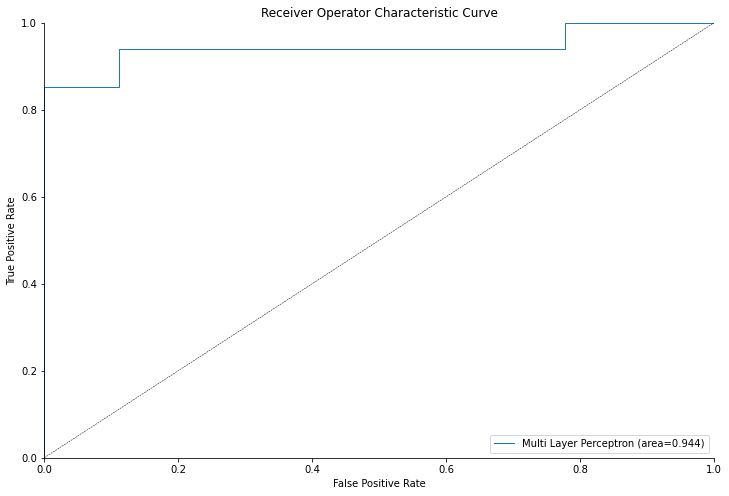

In [104]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,mlp3.predict_proba(X_test3),label='Multi Layer Perceptron',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

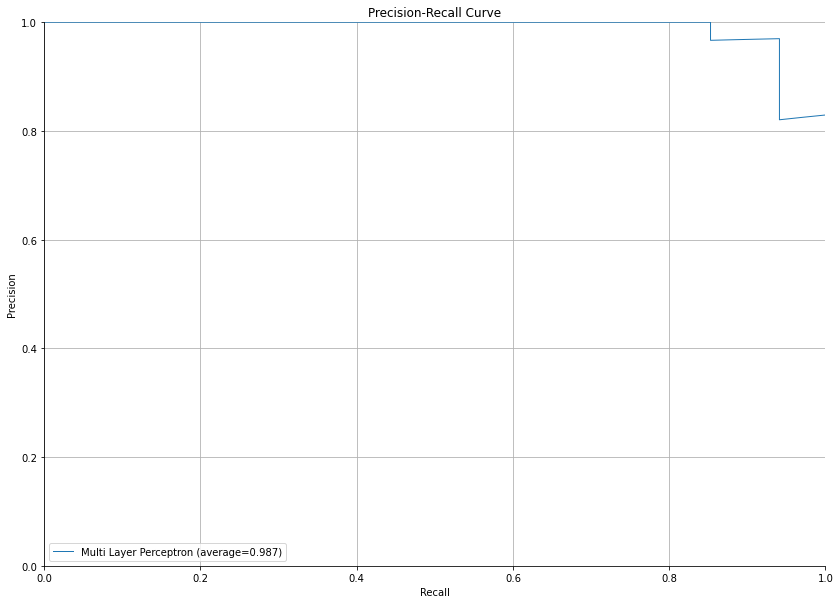

In [105]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,mlp3.predict_proba(X_test3),label='Multi Layer Perceptron',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# K' Nearest Neighbour (n=9)

In [106]:
knn3 = KNeighborsClassifier(9)
knn3.fit(X_train3,y_train3)
y_pred_knn3 = knn3.predict(X_test3)

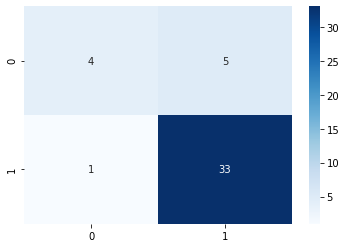

In [107]:
cm=confusion_matrix(y_test3,y_pred_knn3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [108]:
accuracy_score(y_test3,y_pred_knn3)

0.8604651162790697

In [109]:
print(classification_report(y_test3, y_pred_knn3))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.87      0.97      0.92        34

    accuracy                           0.86        43
   macro avg       0.83      0.71      0.74        43
weighted avg       0.85      0.86      0.84        43



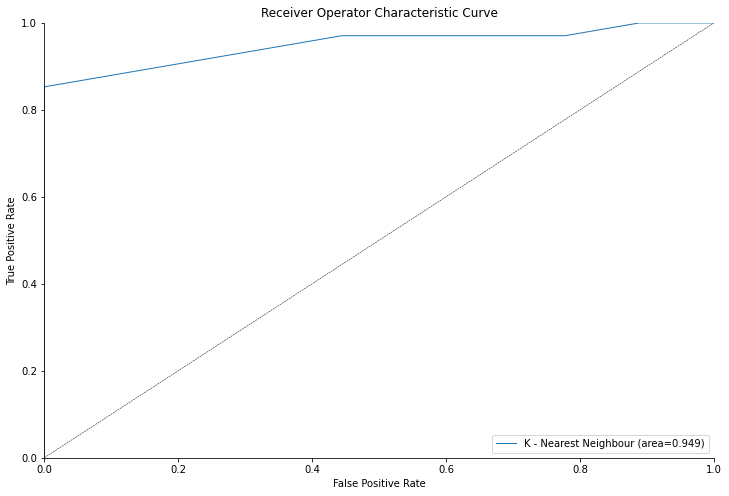

In [110]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,knn3.predict_proba(X_test3),label='K - Nearest Neighbour',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

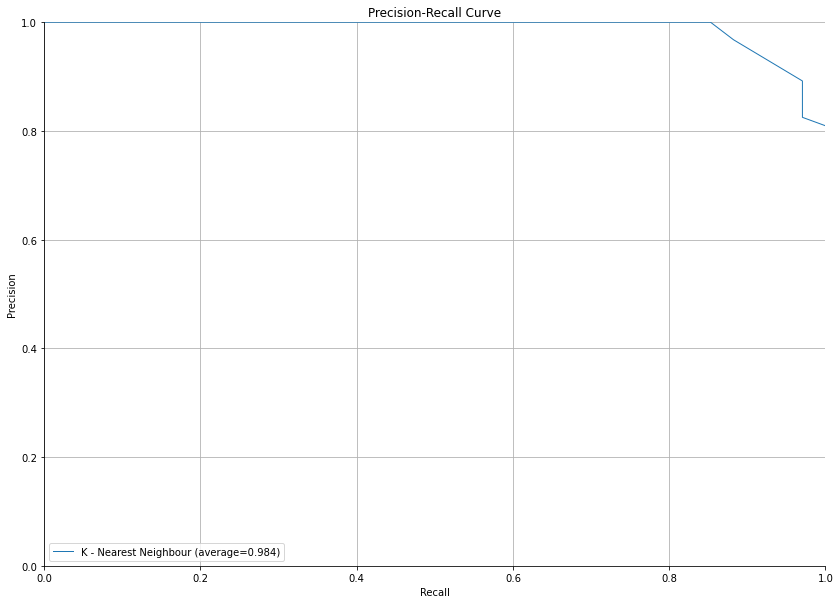

In [111]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,knn3.predict_proba(X_test3),label='K - Nearest Neighbour',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Extra Tree Classifier (n_estimators=500)

In [112]:
et_100_3 = ExtraTreesClassifier(n_estimators= 100)
et_100_3.fit(X_train3,y_train3)
y_pred_et_100_3 = et_100_3.predict(X_test3)

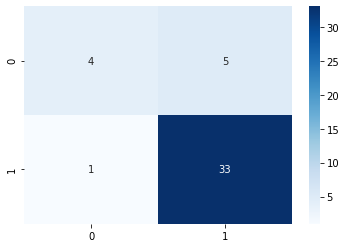

In [113]:
cm=confusion_matrix(y_test3,y_pred_et_100_3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [114]:
accuracy_score(y_test3,y_pred_et_100_3)

0.8604651162790697

In [115]:
print(classification_report(y_test3, y_pred_et_100_3))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.87      0.97      0.92        34

    accuracy                           0.86        43
   macro avg       0.83      0.71      0.74        43
weighted avg       0.85      0.86      0.84        43



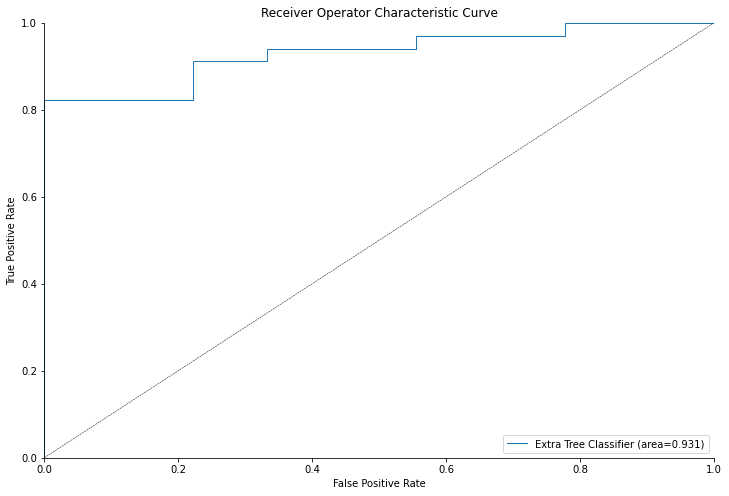

In [116]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,et_100_3.predict_proba(X_test3),label='Extra Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

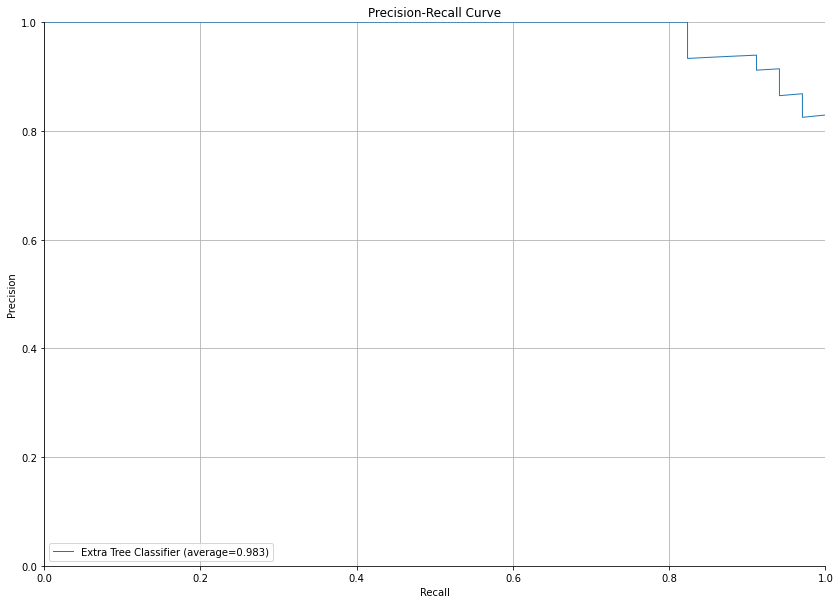

In [117]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,et_100_3.predict_proba(X_test3),label='Extra Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# XGBoost (n_estimators=500)

In [118]:
import xgboost as xgb
xgb3 = xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')
xgb3.fit(X_train3,y_train3)
y_pred_xgb3 = xgb3.predict(X_test3)

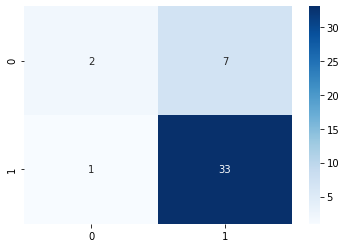

In [119]:
cm=confusion_matrix(y_test3,y_pred_xgb3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [120]:
accuracy_score(y_test3,y_pred_xgb3)

0.813953488372093

In [121]:
print(classification_report(y_test3, y_pred_xgb3))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.82      0.97      0.89        34

    accuracy                           0.81        43
   macro avg       0.75      0.60      0.61        43
weighted avg       0.79      0.81      0.77        43



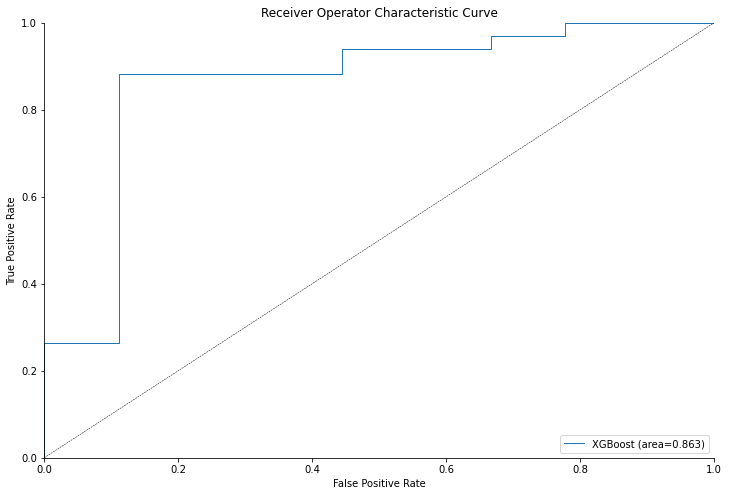

In [122]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,xgb3.predict_proba(X_test3),label='XGBoost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

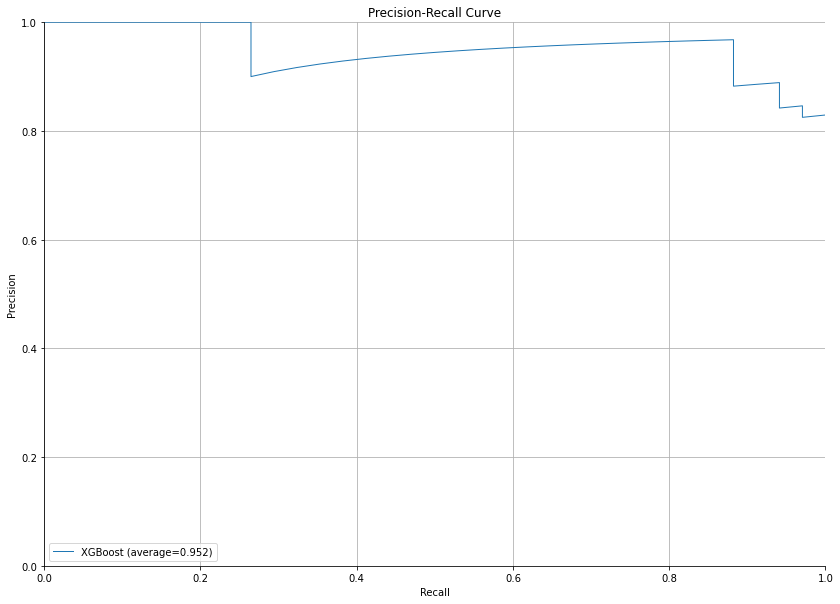

In [123]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,xgb3.predict_proba(X_test3),label='XGBoost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Support Vector Classifier (kernel='linear')

In [124]:
svc3 = SVC(kernel='linear',gamma='auto',probability=True)
svc3.fit(X_train3,y_train3)
y_pred_svc3 = svc3.predict(X_test3)

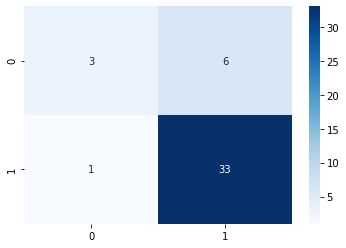

In [125]:
cm=confusion_matrix(y_test3,y_pred_svc3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [126]:
accuracy_score(y_test3,y_pred_svc3)

0.8372093023255814

In [127]:
print(classification_report(y_test3, y_pred_svc3))

              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.85      0.97      0.90        34

    accuracy                           0.84        43
   macro avg       0.80      0.65      0.68        43
weighted avg       0.83      0.84      0.81        43



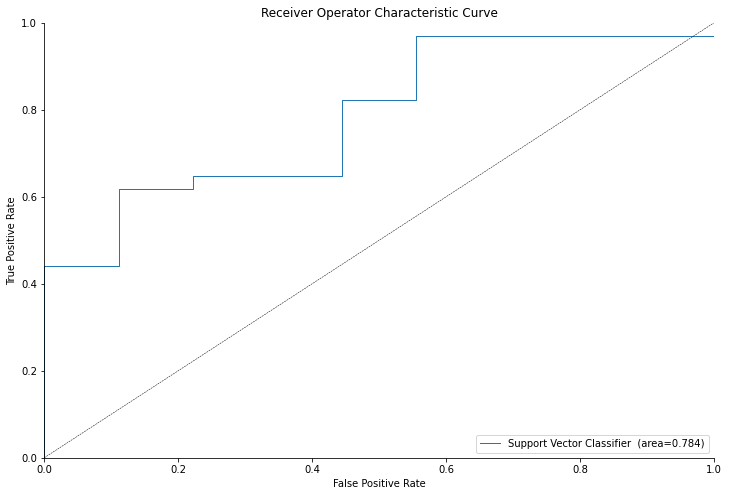

In [128]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,svc3.predict_proba(X_test3),label='Support Vector Classifier ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

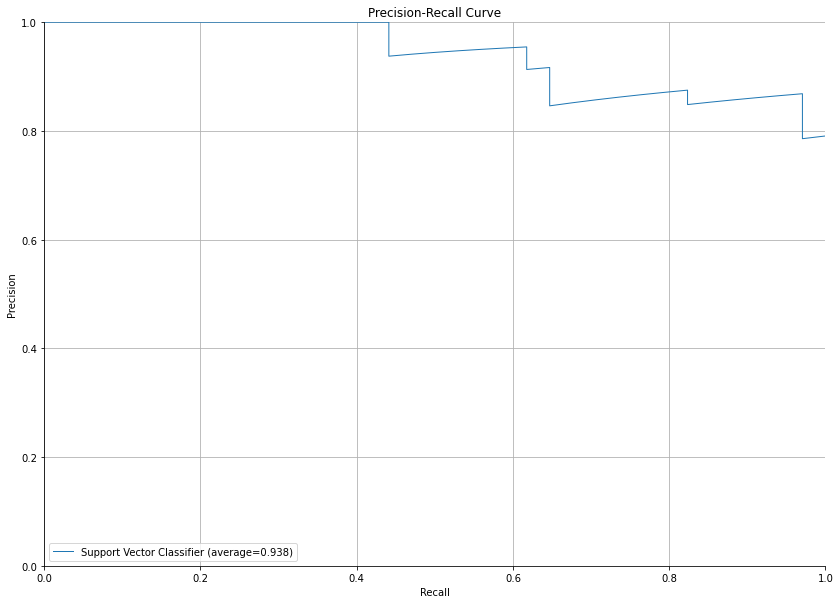

In [129]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,svc3.predict_proba(X_test3),label='Support Vector Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Stochastic Gradient Descent

In [130]:
sgd3 = SGDClassifier(max_iter=1000, tol=1e-4)
sgd3.fit(X_train3,y_train3)
y_pred_sgd3 = sgd3.predict(X_test3)

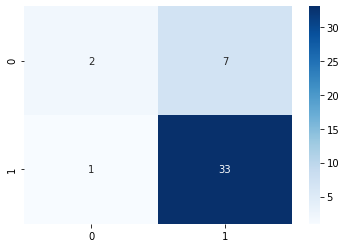

In [131]:
cm=confusion_matrix(y_test3,y_pred_sgd3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [132]:
accuracy_score(y_test3,y_pred_sgd3)

0.813953488372093

In [133]:
print(classification_report(y_test3, y_pred_sgd3))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.82      0.97      0.89        34

    accuracy                           0.81        43
   macro avg       0.75      0.60      0.61        43
weighted avg       0.79      0.81      0.77        43



In [134]:
# f, ax = plt.subplots(figsize=(12,8))

# roc_auc_plot(y_test3,sgd3.predict_proba(X_test3),label='Stochastic Gradient Descent',l='-')

# ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
#         )    
# ax.legend(loc="lower right")    
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Receiver Operator Characteristic Curve')
# sns.despine()

In [135]:
# f, ax = plt.subplots(figsize=(14,10))

# precision_recall_plot(y_test3,sgd3.predict_proba(X_test3),label='Stochastic Gradient Descent',l='-')
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.legend(loc="lower left")
# ax.grid(True)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Precision-Recall Curve')
# sns.despine()

# Adaboost Classifier

In [136]:
ada3 = AdaBoostClassifier()
ada3.fit(X_train3,y_train3)
y_pred_ada3 = ada3.predict(X_test3)

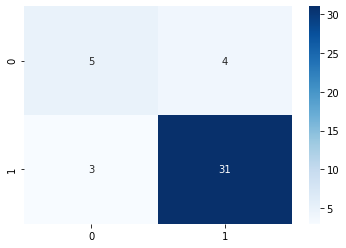

In [137]:
cm=confusion_matrix(y_test3,y_pred_ada3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [138]:
accuracy_score(y_test3,y_pred_ada3)

0.8372093023255814

In [139]:
print(classification_report(y_test3, y_pred_ada3))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.89      0.91      0.90        34

    accuracy                           0.84        43
   macro avg       0.76      0.73      0.74        43
weighted avg       0.83      0.84      0.83        43



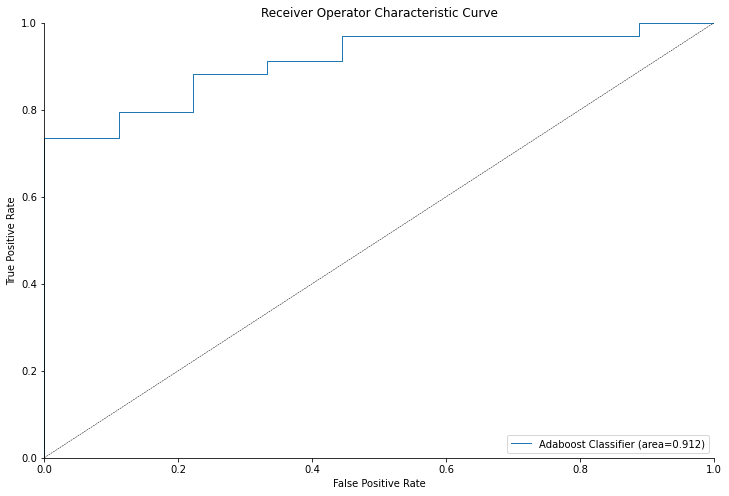

In [140]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,ada3.predict_proba(X_test3),label='Adaboost Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

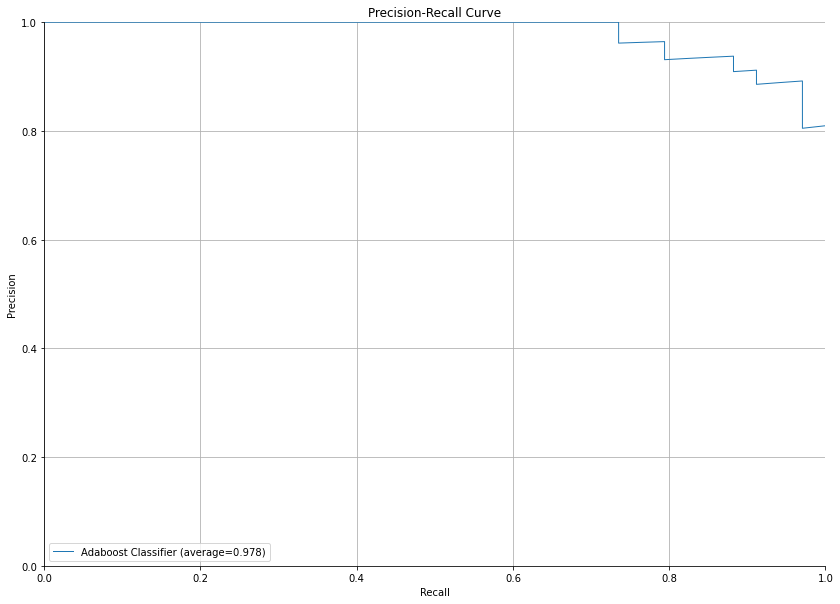

In [141]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,ada3.predict_proba(X_test3),label='Adaboost Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Decision Tree Classifier (CART)

In [142]:
#Visualizing the tree
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

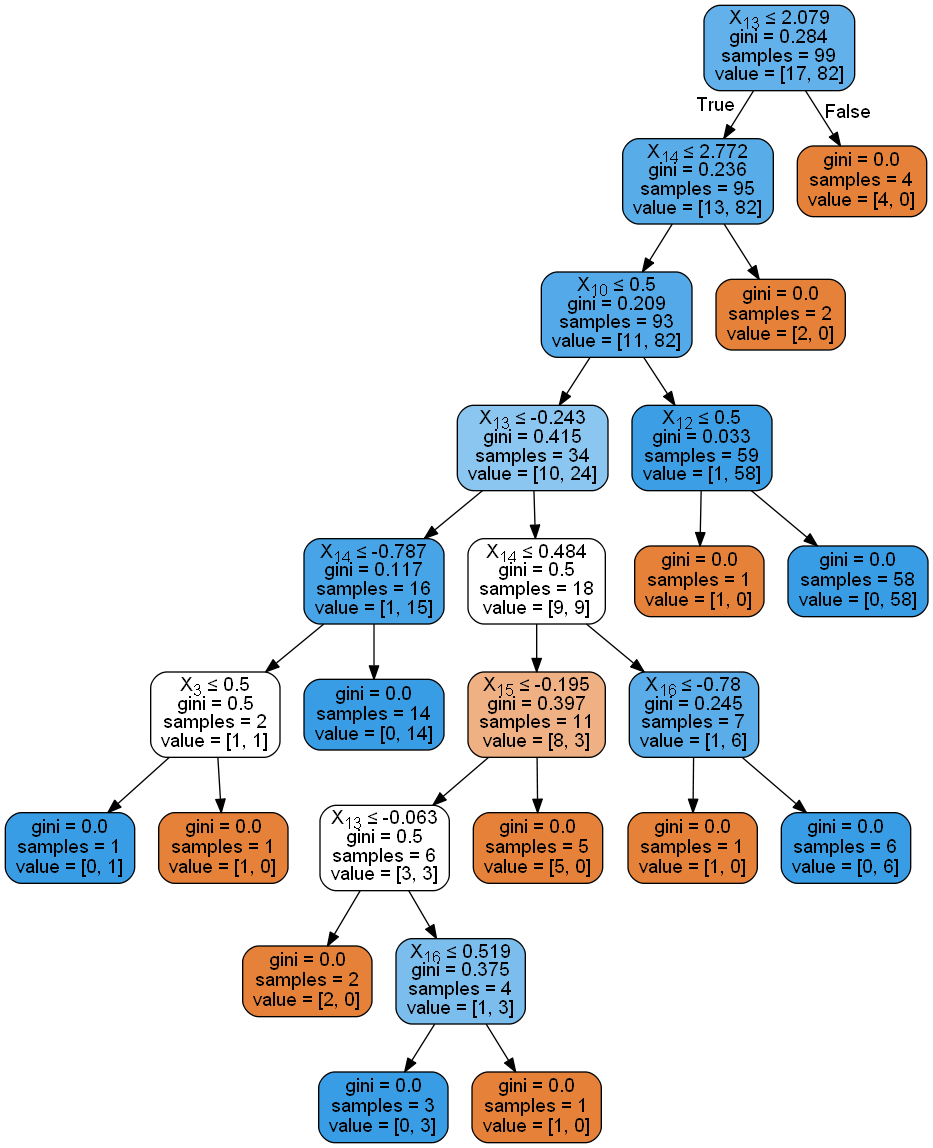

In [143]:
dtc3 = DecisionTreeClassifier()
DT3 = dtc3.fit(X_train3,y_train3)
y_pred_dtc3 = dtc3.predict(X_test3)

dot_data = StringIO()
export_graphviz(DT3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

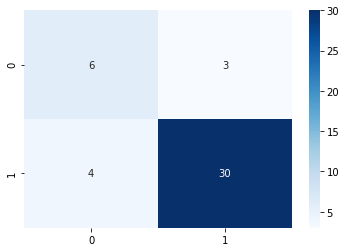

In [144]:
cm=confusion_matrix(y_test3,y_pred_dtc3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [145]:
accuracy_score(y_test3,y_pred_dtc3)

0.8372093023255814

In [146]:
print(classification_report(y_test3, y_pred_dtc3))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.91      0.88      0.90        34

    accuracy                           0.84        43
   macro avg       0.75      0.77      0.76        43
weighted avg       0.84      0.84      0.84        43



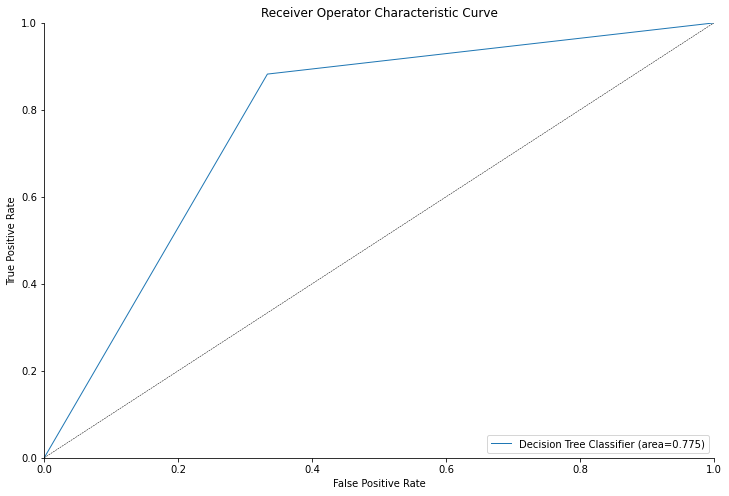

In [147]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,dtc3.predict_proba(X_test3),label='Decision Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

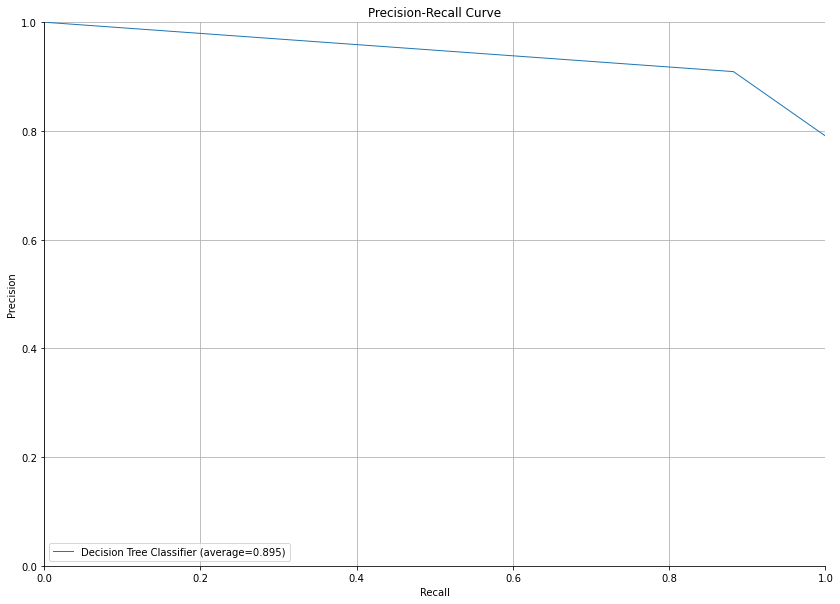

In [148]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,dtc3.predict_proba(X_test3),label='Decision Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Gradient Boosting Machine

In [149]:
gbm3 = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm3.fit(X_train3,y_train3)
y_pred_gbm3 = gbm3.predict(X_test3)

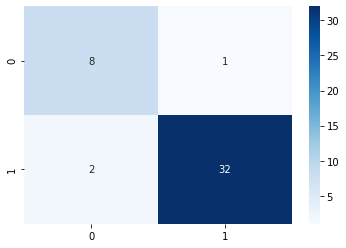

In [150]:
cm=confusion_matrix(y_test3,y_pred_gbm3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [151]:
accuracy_score(y_test3,y_pred_gbm3)

0.9302325581395349

In [152]:
print(classification_report(y_test3, y_pred_gbm3))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.97      0.94      0.96        34

    accuracy                           0.93        43
   macro avg       0.88      0.92      0.90        43
weighted avg       0.93      0.93      0.93        43



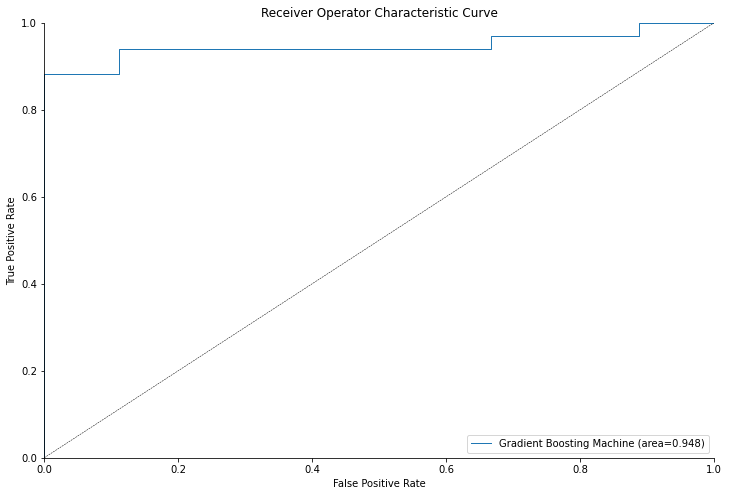

In [153]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test3,gbm3.predict_proba(X_test3),label='Gradient Boosting Machine',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

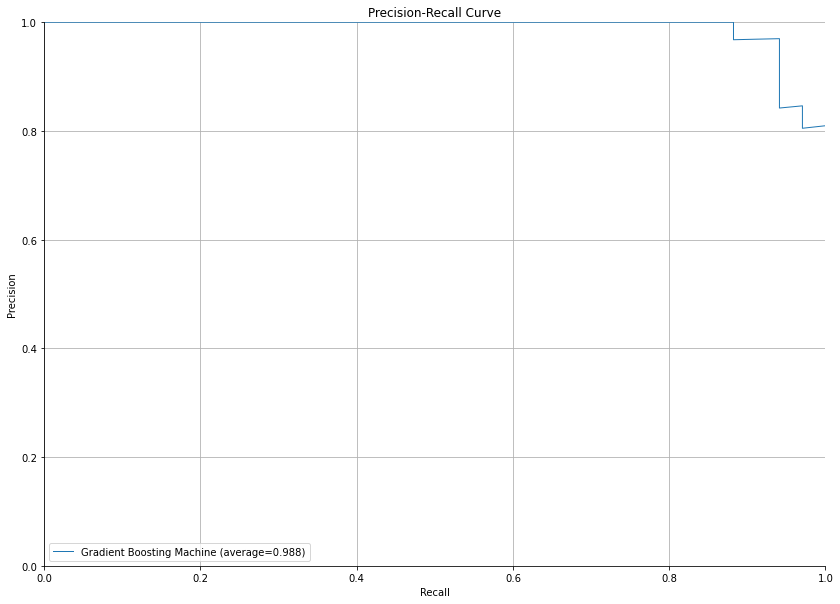

In [154]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,gbm3.predict_proba(X_test3),label='Gradient Boosting Machine',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Comparison of All Models

Model	/ Accuracy	/ Precision	/ Sensitivity	/ Specificity	/ F1 Score	/ ROC	/ Log_Loss	/ mathew_corrcoef

In [155]:
CM3=confusion_matrix(y_test3,y_pred_rfe3)
#sns.heatmap(CM, annot=True)

TN3 = CM3[0][0]
FN3 = CM3[1][0]
TP3 = CM3[1][1]
FP3 = CM3[0][1]
specificity3 = TN3/(TN3+FP3)
loss_log3 = log_loss(y_test3, y_pred_rfe3)
acc3= accuracy_score(y_test3, y_pred_rfe3)
roc3=roc_auc_score(y_test3, y_pred_rfe3)
prec3 = precision_score(y_test3, y_pred_rfe3)
rec3 = recall_score(y_test3, y_pred_rfe3)
f1_3 = f1_score(y_test3, y_pred_rfe3)

mathew3 = matthews_corrcoef(y_test3, y_pred_rfe3)
model_results3 =pd.DataFrame([['Random Forest',acc3, prec3,rec3,specificity3, f1_3,roc3, loss_log3,mathew3]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])


In [156]:
data3 = {        'MLP': y_pred_mlp3, 
                'KNN': y_pred_knn3, 
                'EXtra tree classifier': y_pred_et_100_3,
                'XGB': y_pred_xgb3, 
                'SVC': y_pred_svc3, 
                'SGD': y_pred_sgd3,
                'Adaboost': y_pred_ada3, 
                'CART': y_pred_dtc3, 
                'GBM': y_pred_gbm3 }

models3 = pd.DataFrame(data3) 
 
for column3 in models3:
    CM3=confusion_matrix(y_test3,models3[column3])
    
    TN3 = CM3[0][0]
    FN3 = CM3[1][0]
    TP3 = CM3[1][1]
    FP3 = CM3[0][1]
    specificity3 = TN3/(TN3+FP3)
    loss_log3 = log_loss(y_test3, models3[column3])
    acc3= accuracy_score(y_test3, models3[column3])
    roc3=roc_auc_score(y_test3, models3[column3])
    prec3 = precision_score(y_test3, models3[column3])
    rec3 = recall_score(y_test3, models3[column3])
    f1_3 = f1_score(y_test3, models3[column3])
    mathew3 = matthews_corrcoef(y_test3, models3[column3])
    
    results3 =pd.DataFrame([[column3,acc3, prec3,rec3,specificity3, f1_3,roc3, loss_log3,mathew3]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results3 = model_results3.append(results3, ignore_index = True)


model_results3

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.837209,0.864865,0.941176,0.444444,0.901408,0.692810,5.622684,0.452736
1,MLP,0.860465,0.888889,0.941176,0.555556,0.914286,0.748366,4.819439,0.547372
2,KNN,0.860465,0.868421,0.970588,0.444444,0.916667,0.707516,4.819457,0.526704
3,EXtra tree classifier,0.860465,0.868421,0.970588,0.444444,0.916667,0.707516,4.819457,0.526704
4,XGB,0.813953,0.825000,0.970588,0.222222,0.891892,0.596405,6.425949,0.307894
5,SVC,0.837209,0.846154,0.970588,0.333333,0.904110,0.651961,5.622703,0.425657
6,SGD,0.813953,0.825000,0.970588,0.222222,0.891892,0.596405,6.425949,0.307894
7,Adaboost,0.837209,0.885714,0.911765,0.555556,0.898551,0.733660,5.622666,0.488536
8,CART,0.837209,0.909091,0.882353,0.666667,0.895522,0.774510,5.622647,0.528678
9,GBM,0.930233,0.969697,0.941176,0.888889,0.955224,0.915033,2.409701,0.799311


# Findings:


AS we can see from above results, Gradient Boosting Classifier is best performer as it has highest test accuracy of 0.930233, sensitivity of 0.94 and specificity of 0.889 and highest f1-score of 0.96 and lowest Log Loss of 2.41.

# ROC AUC Curve of Top Performing Models - Combined

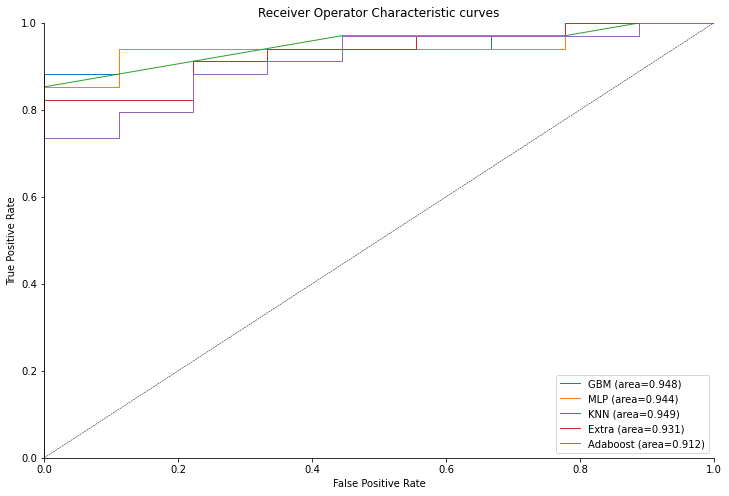

In [158]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test3,gbm3.predict_proba(X_test3),label='GBM',l='-')
roc_auc_plot(y_test3,mlp3.predict_proba(X_test3),label='MLP',l='-')
roc_auc_plot(y_test3,knn3.predict_proba(X_test3),label='KNN',l='-')
roc_auc_plot(y_test3,et_100_3.predict_proba(X_test3),label='Extra',l='-')
roc_auc_plot(y_test3,ada3.predict_proba(X_test3),label='Adaboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision Recall Curve of Top Performing Models - Combined

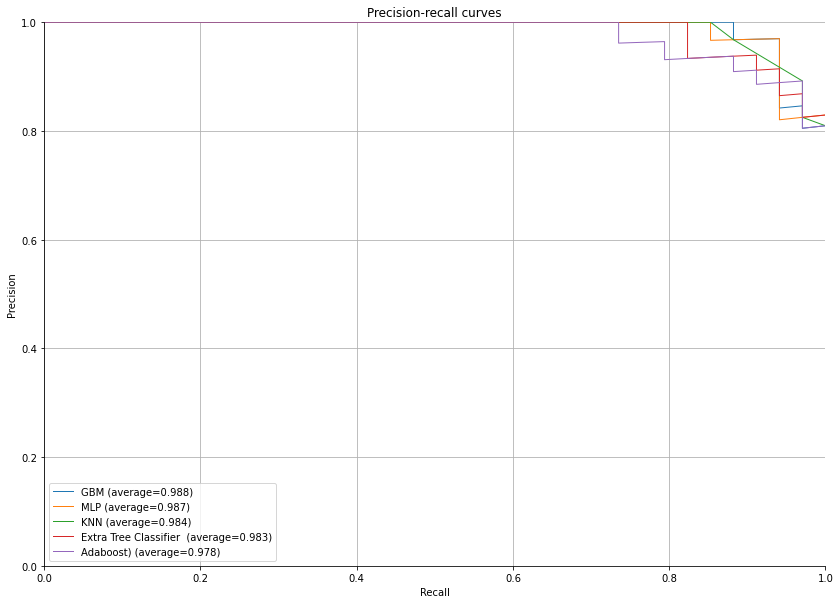

In [159]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test3,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test3, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test3,gbm3.predict_proba(X_test3),label='GBM',l='-')
precision_recall_plot(y_test3,mlp3.predict_proba(X_test3),label='MLP',l='-')
precision_recall_plot(y_test3,knn3.predict_proba(X_test3),label='KNN',l='-')
precision_recall_plot(y_test3,et_100_3.predict_proba(X_test3),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test3,ada3.predict_proba(X_test3),label='Adaboost)',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Importance

<AxesSubplot:>

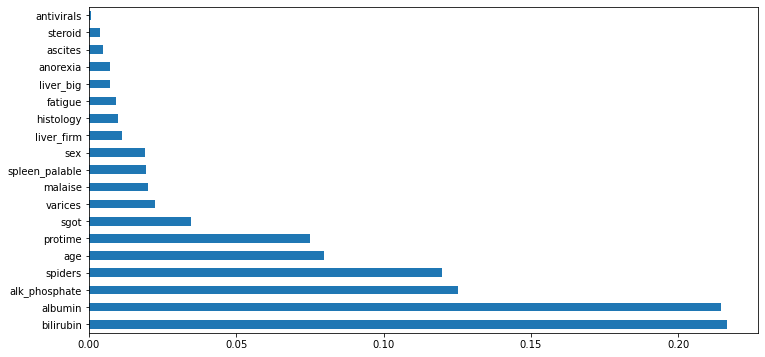

In [160]:
feat_importances = pd.Series(gbm3.feature_importances_, index=X_train3.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(12,6))

# Conclusion:
    
    
We here that Gradient Boost machine resulted in higher performance.

Top 5 most important features are:

i) bilirubin, ii) albumin, iii) alk_phosphate, iv) spiders and v) age